## Proyecto Integrador

### Avance 1

##### 1.Importación de las librerias para llevar adelante el análisis

In [1]:
import numpy as np # importación libreria Numpy
import pandas as pd # Importación libreria Pandas

##### 2. Para observar los datos, utilizamos el archivo CSV y por medio de pandas read_csv leemos el contenido de la data

In [2]:
data=pd.read_csv('data_latinoamerica.csv',parse_dates=['date']) # Leo el archivo y parseo la columna fecha"date"

data.head() # Que me muestre solo las primeras 5 cincos filas

location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

##### 3.Se comprueba la cantidad de filas y columnas por medio de las siguientes funciones

In [3]:
data.shape # funcion Pandas 

(12216057, 50)

In [4]:
np.shape(data) # funcion Numpy

(12216057, 50)

##### 4. Seleccionamos los paises donde se expandira Biogenesys

In [5]:
paises_seleccionados= ['Colombia','Argentina','Chile','Mexico','Peru','Brazil'] # Países solicitados para realizar el análisis
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)] # filtro para extraer los paises descipto en la lista

##### 5. Luego del filtrado anterior podremos observar cuantas filas quedaron

In [6]:
data_latinoamerica.shape # para saber cuantas filas quedaron usamos la viarble (data_latinoamerica)
# como se puede ver luego del friltrado se redugo casi a la mitad, aun asi es un volumen de datos altos para trabajar

(11970289, 50)

##### 6. Para seguir con la limpieza de datos, vamos a hacer un análisis mas profundo, vamos a ver que datos nulos hay. Esto se hara  a traves del siguiente código, donde realiza un filtrado de valores nulos por columna

In [7]:
data_latinoamerica.isnull().sum() # suma los valores nulos por columnas
# se puede observar que el resultado arroja algunas columnas con cero nulos mientras otras siguen con valores nulos
#[data_latinoamerica.isnull().sum()>=0]

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


##### 7. En el filtrado anterior se puede observar que la columna "location_key" no contiene valores nulos, vamos a investigar mas en profundidad esta columna para observar si contiene valores duplicados

In [ ]:
data_latinoamerica.location_key.value_counts() # esta funcion nos permite saber los valores unicos de nuestro DF
# Se observa que varios paises contienen duplicados

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

##### 8. Luego de haber analizado la calidad de los datos, se observa que los duplicados provienen de las subcategorias. Por esto vamos a realizar un nuevo filtrado pero de los paises seleccionados.

In [ ]:
data_latinoamerica_paises= data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])] #Creo una lista con los nombres cortos de los paises seleccionados, ya que en el paso anterior vemos que los datos nulos en su mayoria se encuentran en subcategorias de la location_key.
#Es decir, dejamos solo las claves de dos letras de cada país.

data_latinoamerica_paises.shape # veo cuantas filas quedaron

(5946, 50)

##### 9. Filtrar el nuevo DF por fechas, a partir del 2021-01-01

In [ ]:
data_latinoamerica_paises_fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01'] # se realiza un filtrado por fecha y se guarda en la nueva variable (data_latinoamerica_paises_fecha)

In [ ]:
data_latinoamerica_paises_fecha.shape # se observa cuantas filas quedaron

(3744, 50)

##### 10. Con el nuevo filtrado por fechas, vamos a ver la calidad de los elementos que tenemos vacios, en caso de tenerlos, se procedera a eliminarlos.

In [ ]:
valores_nulos_fecha=data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0] #se quiere ver cuantos valores nulos hay por columna para tomar la decisión de llenarlos o no 
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [ ]:
valores_nulos_fecha.index #Obtengo los nombes de las columnnas en las que se encuentran los datos nulos.

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [ ]:
#Relleno con 0 los nulos delas columnas 'new_recovered, 'cumulative_vaccine_doses_administered' y 'cumulative_recovered'
data_latinoamerica_paises_fecha.loc [:, ['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']] = data_latinoamerica_paises_fecha.groupby('country_name')[['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']].fillna(0)

C:\Users\Anto\AppData\Local\Temp\ipykernel_15664\510709598.py:2: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  data_latinoamerica_paises_fecha.loc [:, ['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']] = data_latinoamerica_paises_fecha.groupby('country_name')[['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']].fillna(0)


In [ ]:
# Relleno con 0 los valores negativos de la columna "new recovered"
data_latinoamerica_paises_fecha.loc[:, 'new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].clip(lower=0)

In [ ]:
data_latinoamerica_paises_fecha.new_confirmed.mean()

np.float64(13936.279613215149)

In [ ]:
data_latinoamerica_paises= data_latinoamerica_paises.astype({'new_confirmed':float})

In [ ]:
# Manejamos los valores nulos segun cada columa y agrupamos los datos por el código del país
data_latinoamerica_paises_fecha['average_temperature_celsius']=data_latinoamerica_paises_fecha.groupby('country_code')['average_temperature_celsius'].transform(lambda x:x.fillna(x.mean()))
data_latinoamerica_paises_fecha[['new_confirmed', 'new_deceased', 'new_recovered']] = data_latinoamerica_paises_fecha.groupby('country_code')[['new_confirmed', 'new_deceased', 'new_recovered']].transform(lambda x: x.fillna(0))
data_latinoamerica_paises_fecha[['cumulative_recovered', 'cumulative_confirmed', 'cumulative_deceased']] = data_latinoamerica_paises_fecha.groupby('country_code')[['cumulative_recovered', 'cumulative_confirmed', 'cumulative_deceased']].transform(lambda x: x.ffill())
data_latinoamerica_paises_fecha = data_latinoamerica_paises_fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True)
data_latinoamerica_paises_fecha = data_latinoamerica_paises_fecha.groupby('country_code').apply(lambda x: x.fillna(0))

C:\Users\Anto\AppData\Local\Temp\ipykernel_6512\2989048584.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_latinoamerica_paises_fecha = data_latinoamerica_paises_fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True)
C:\Users\Anto\AppData\Local\Temp\ipykernel_6512\2989048584.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_latinoamerica_paises_fecha = data_latinoame

In [ ]:
# Relleno con 0 los valores negativos de la columna "new_confirmed"
data_latinoamerica_paises_fecha.loc[:, 'new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].clip(lower=0)

In [ ]:
# Verifico la cantidad de instancias vaciaas y las dimenciones del nuevo dataset.

print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

Series([], dtype: int64)
(3744, 50)


##### 11. Se guarda el nuevo dataset en un archivo csv.

In [ ]:
# Se guardo el dataset filtrado por fecha en un archivo csv para poder utilizarlo en el análisis y que no sea necesario cargar el archivo original.

data_latinoamerica_paises_fecha.to_csv('DatosFinalesFiltrados.csv', index=False)

In [ ]:
data_latinoamerica_paises=pd.read_csv('DatosFinalesFiltrados.csv',sep=',') # se corrobora que se haya guardado de forma correcta y que se puede leer sin problemas

In [ ]:
# Llamo a la funcion para ver los datos.

data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina         7767.0   
1              AR  2021-01-03           AR    Argentina         4934.0   
2              AR  2021-01-04           AR    Argentina        13953.0   
3              AR  2021-01-05           AR    Argentina        14085.0   
4              AR  2021-01-06           AR    Argentina        14496.0   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru         1150.0   
3740           PE  2022-09-14           PE         Peru            0.0   
3741           PE  2022-09-15           PE         Peru            0.0   
3742           PE  2022-09-16           PE         Peru            0.0   
3743           PE  2022-09-17           PE         Peru            0.0   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0            166.0             1670634.0              46688.0   
1            157.0             1675568.0              46845.0   
2            157.0             1689521.0              47002.0   
3            160.0             1703606.0              47162.0   
4            131.0             1718102.0              47293.0   
...            ...                   ...                  ...   
3739          22.0             4127612.0             216173.0   
3740           0.0             4127612.0             216173.0   
3741           0.0             4127612.0             216173.0   
3742           0.0             4127612.0             216173.0   
3743           0.0             4127612.0             216173.0   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

##### 12. Se procede a utilizar el ciclo for/while para el cálculo de estadistica descriptiva y otras métricas importantes que ofrece pandas por default.

In [ ]:
# Estadistica descriptiva ciclo for, haciendo clic en "scrollable element, se podra ver todas las columnas"

for i in data_latinoamerica_paises.columns: #iteramos sobra cada una de las columnas del dataframe
    print(i) #imprimo el nombre de la columna
    print(data_latinoamerica_paises[i].describe()) #utilizo el metodo describe para imprimir las estadisticas de la columna
    print('-----------------------------') #imprimo un separador para mejor lectura

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------
new_confirmed
count      3744.000000
mean      13858.264423
std       24227.711725
min           0.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------
new_deceased
count     3744.000000
mean       275.609509
std        507.443506
min          0.000000
25%         25.000000
50%         98.000000
75%        311.

In [ ]:
#Estadistica descriptiva con ciclo While:

i = 0 #defino con valor 0 a i
while i<len(data_latinoamerica_paises.columns): #mientras i sea menor al tamaño de columnas , hara un ciclo yendo por cada columana
    print(data_latinoamerica_paises.columns[i])  #imprimo el nombre de la columna
    print(data_latinoamerica_paises[data_latinoamerica_paises.columns[i]].describe()) #utilizo el metodo describe para imprimir las estadisticas de la columna
    print('--------------------------') #imprimo un separador para mejor lectura
    i+=1 #se suma 1 a la variable i para que vuelva a repetir el ciclo while

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------
new_confirmed
count      3744.000000
mean      13858.264423
std       24227.711725
min           0.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------
new_deceased
count     3744.000000
mean       275.609509
std        507.443506
min          0.000000
25%         25.000000
50%         98.000000
75%        311.000000
max     

##### 13.Respuesta a las preguntas requeridas

###### ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
###### Estas metricas halladas nos proporcionan un patallazo rápido y general de los datos que tenemos. Nos brinda ayuda para empezar a tener una idea sobre los datos previo a realizar cualquier otro análisis.

###### ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
###### No se muestran todas las estadísticas, en las columnas donde tenemos datos del tipo cualitativo (categorico) no se pueden observar. Permite conocer la cantidad, cual es el valor repetido,etc. En cambio en las columnas que tenemos datos cuantitativos (numericos) si muestra las estadísticas como la media, desviación estandar, valor máximo y mínimo,etc. 
###### Cuando utilizamos describe() en las columnas de datos numericos, nos deja afuera el valor de la moda, mediana, varianza y rango.

###### ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
###### La razón de lo anteriormte mensionado reside en el tipo de datos que tenemos en cada columna. De esta forma podremos llegar a conclusiones erroneas, por eso es necesario poder realizar los demás cálculos estadisticos (moda,mediana.varianza y rango)

##### 14. Creamos una función que nos permita obtener la mediana,varianza y el rango.

In [ ]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana: ', data[i].median())
            print('Varianza: ', data[i].var())
            print('Rango: ', data[i].max() - data[i].min())
            print('Moda: ', data[i].mode())
            print('-------------------------')

In [ ]:
describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana:  5112.5
Varianza:  586982015.4347371
Rango:  298408.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
Mediana:  98.0
Varianza:  257498.91186254224
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
-------------------------
cumulative_confirmed
Mediana:  3643377.0
Varianza:  64081091330927.14
Rango:  34567862.0
Moda:  0    6304317.0
Name: cumulative_confirmed, dtype: float64
-------------------------
cumulative_deceased
Mediana:  139628.5
Varianza:  33487916463.656017
Rango:  685202.0
Moda:  0    141708.0
Name: cumulative_deceased, dtype: float64
-------------------------
cumulative_vaccine_doses_administered
Mediana:  32445756.5
Varianza:  8551958275078892.0
Rango:  347868481.0
Moda:  0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
-------------------------
population
Mediana:  47910798.0
Varianza:  4507478439615793.0
Rango:  194985406.0
Moda:  0     17574003.0
1     29381884.0
2    

### Avance 2

##### 1. Se importan las librerias que se van a utilizar en este apartado.

In [ ]:
import pandas as pd                 # Se importa la libreria pandas
import numpy as np                  # Se importa la libreria numpy
import matplotlib.pyplot as plt     # Se importa la libreria matplotlib
import seaborn as sns               # Se importa la libreria seaborn

In [ ]:
# Vamos a trabar con el dataframe creado al final del avance anterior

data_latinoamerica_paises= pd.read_csv('DatosFinalesFiltrados.csv',sep=',') #Leemos el archivo csv con pandas

##### 2. Análisis Estadísticos con Pandas y Numpy

In [ ]:
#Examinamos las propiedades estadisticas del dataframe 

for i in data_latinoamerica_paises.columns: #iteramos sobra cada una de las columnas del dataframe
    print(i) #imprimo el nombre de la columna
    print(data_latinoamerica_paises[i].describe()) #utilizo el metodo describe para imprimir las estadisticas de la columna
    print('------------------------') #imprimo un separador para mejor lectura

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------------------------
new_confirmed
count      3744.000000
mean      13858.264423
std       24227.711725
min           0.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------------
new_deceased
count     3744.000000
mean       275.609509
std        507.443506
min          0.000000
25%         25.000000
50%         98.000000
75%        311.000000
max      11447.000

##### 3. Visualización de datos con Matplotlib y Seaborn

In [ ]:
# Se determina los países de interes para el proyecto

paises_seleccionados= ['Argentina','Colombia','Chile','Brazil','Mexico','Peru']

In [ ]:
# Pasamos los valores de la columna date al tipo datetime, para poder hacer un análisis a lo largo del tiempo

data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True) # lo que se busca con este código es que la fecha sea en el indice de nuestro DF

In [ ]:
print(data_latinoamerica_paises['average_temperature_celsius'].dtype)

float64


In [ ]:
# Antes de comenzar con las visualizaciones defino la paleta de colores a utilizar en los diferentes gráficos

mi_paleta = ['#5E8FB9','#78B056','#325F8C','#D2293D','#FFCC9E','#DB5920']

a.-  Matriz de Correlación

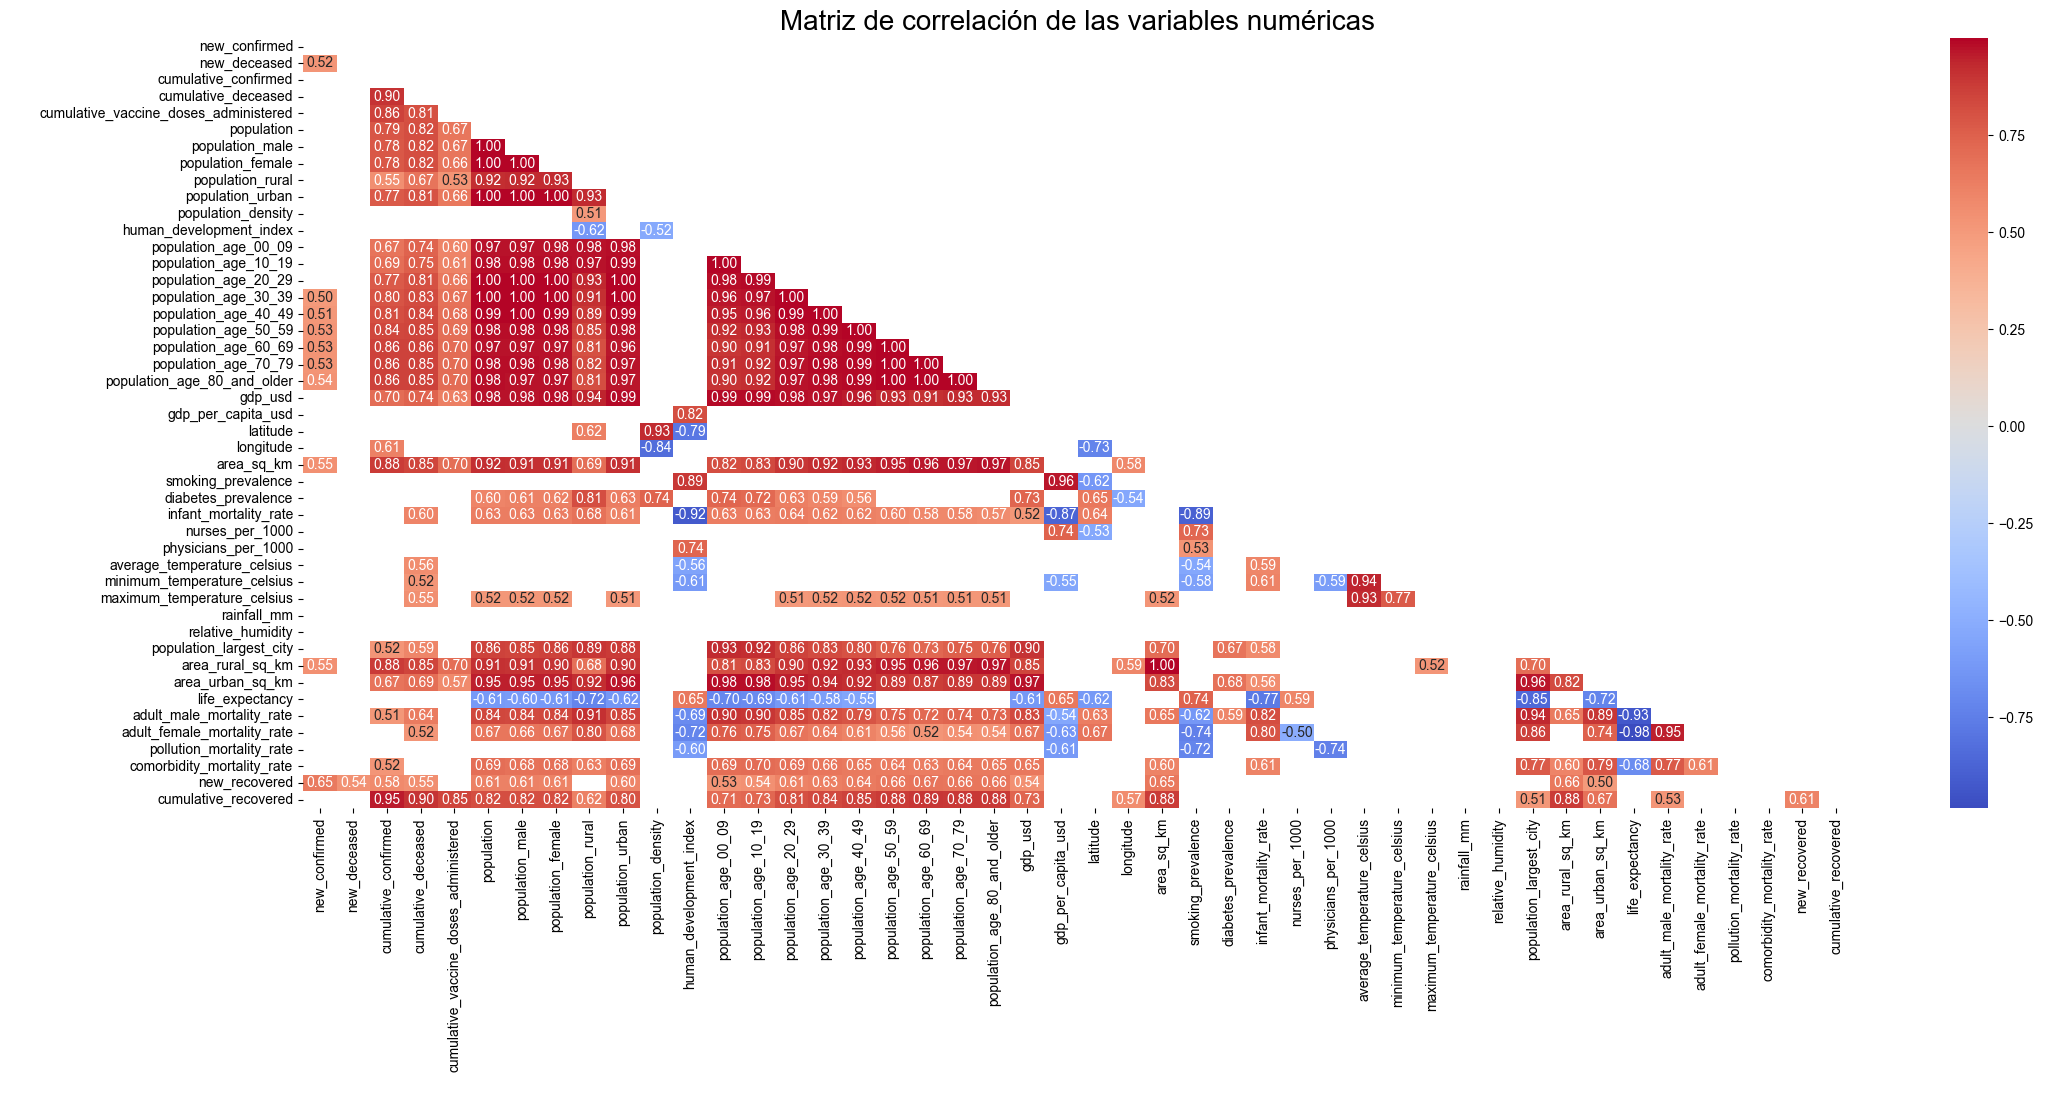

In [ ]:
# Se crea la Matriz y una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5"
# Con este gráfico, podemos tener una visión general de como se van a correlacionar nuestras variables y vamos  poder hacer hincapié en aquellas con mayor inciendia para analisis posteriores

columnas_numerica = data_latinoamerica_paises.select_dtypes(include=['float64','int64']).columns
matriz_correlacion = data_latinoamerica_paises [columnas_numerica].corr()
mascara = np.triu(np.ones_like(matriz_correlacion,dtype=bool))
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) > abs(0.5)] #para ayudarnos visualmente, ocultamos todos los valores de correlacion menores a 0.50 y mayores a -0.5


# Se crea la gráfica
plt.figure(figsize=(25, 10)) #creo la figura, ajusto el tamaño del gráfico
heatmap = sns.heatmap(matriz_correlacion, mask= mascara, annot = True, cmap='coolwarm',fmt=".2f") #Se arma el mapa de calor que nos dará el gráfico de correlación
sns.set_style('darkgrid')
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

b.- Gráfico de barras de países contra el resto de variables

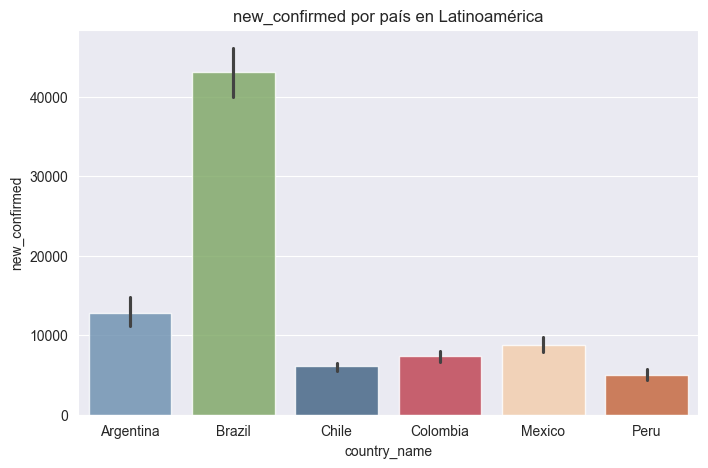

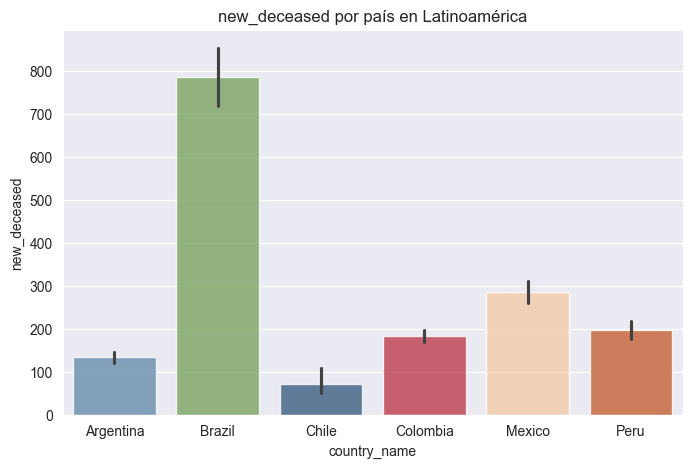

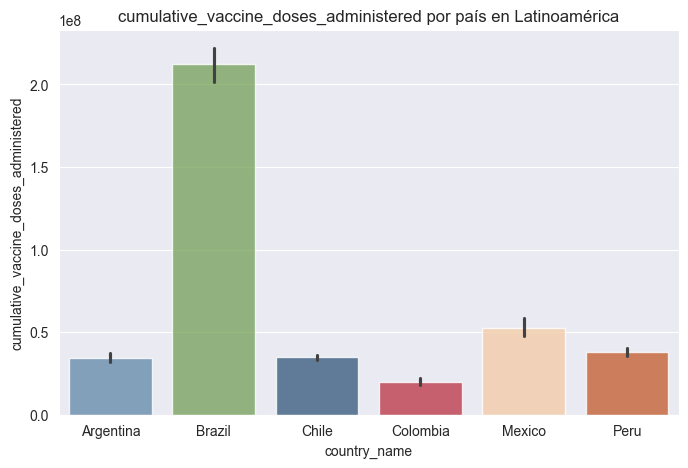

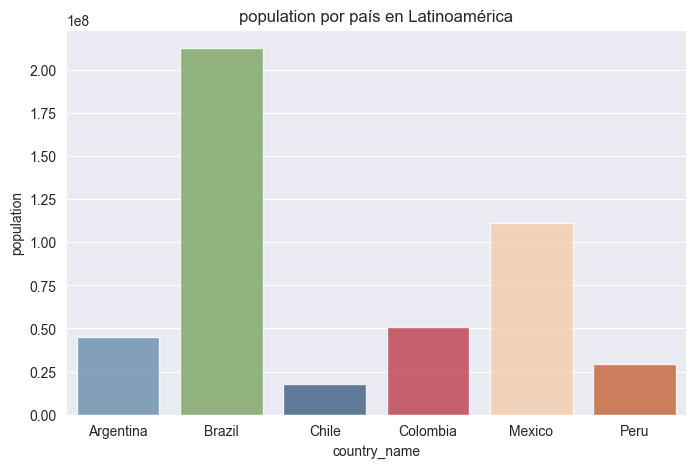

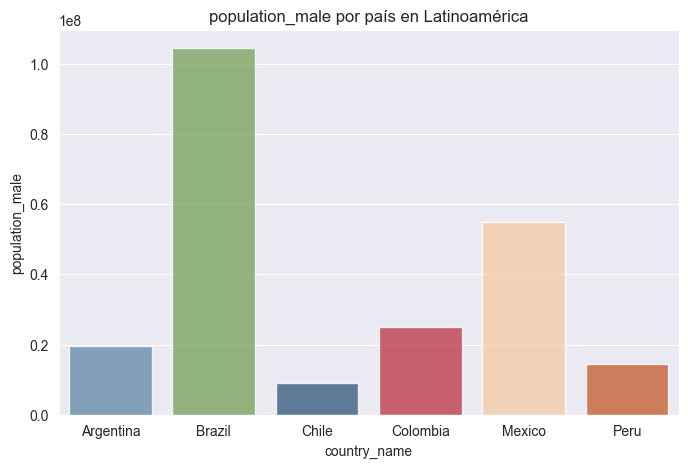

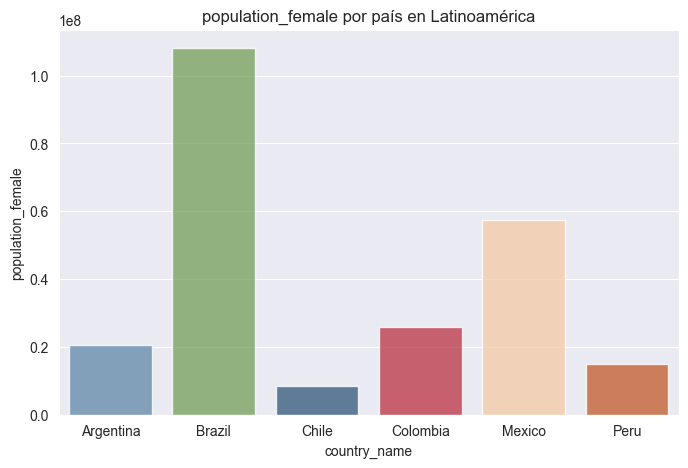

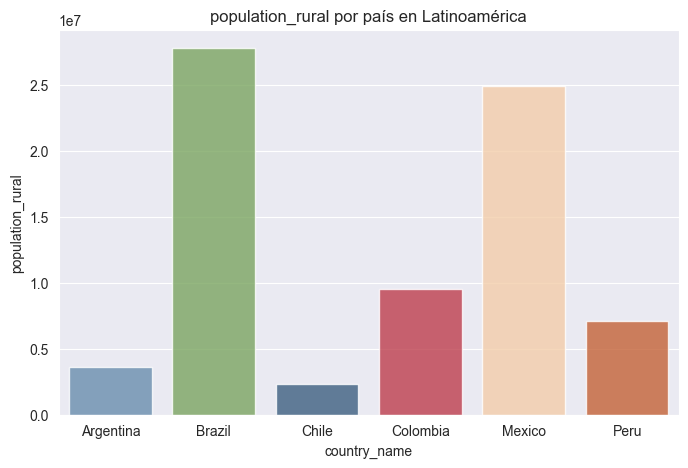

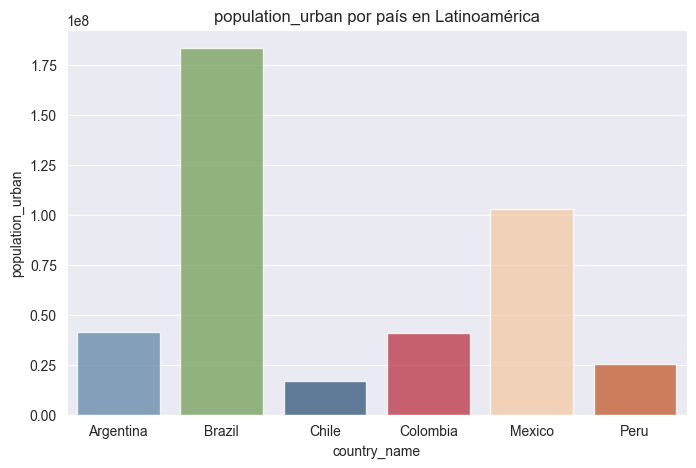

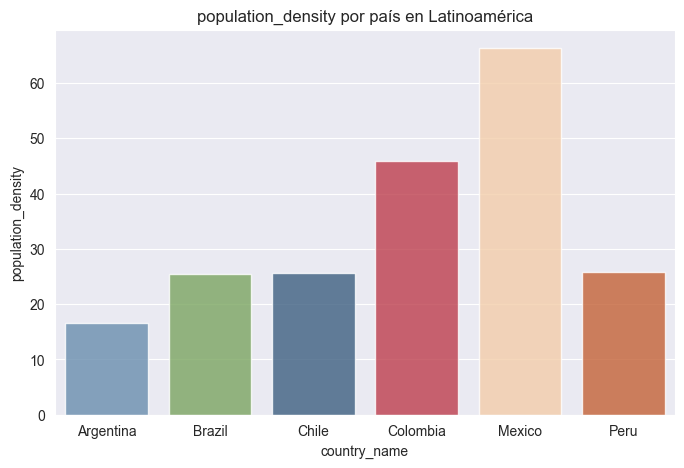

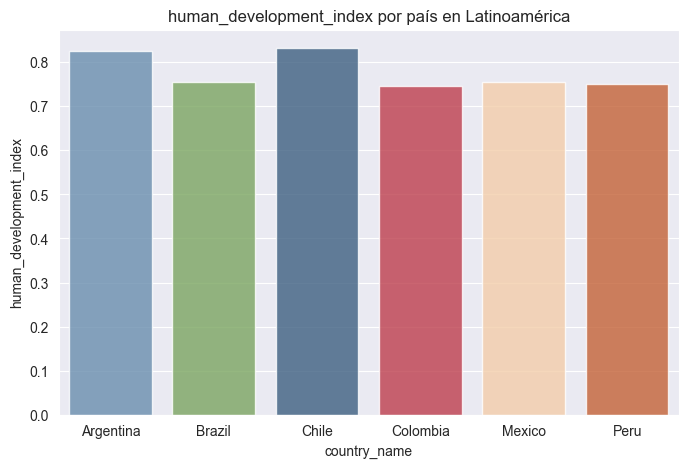

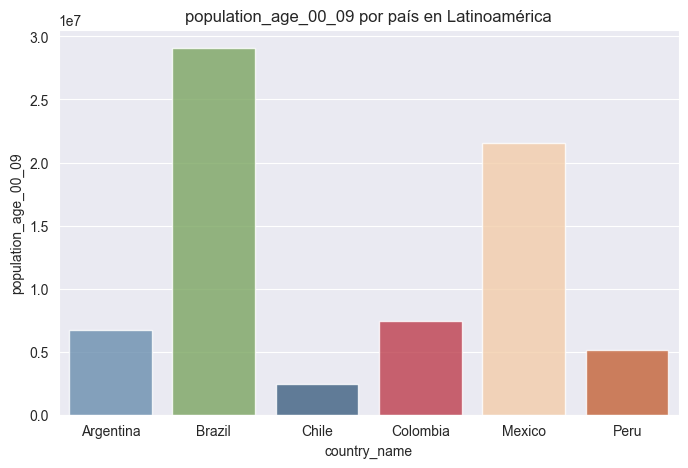

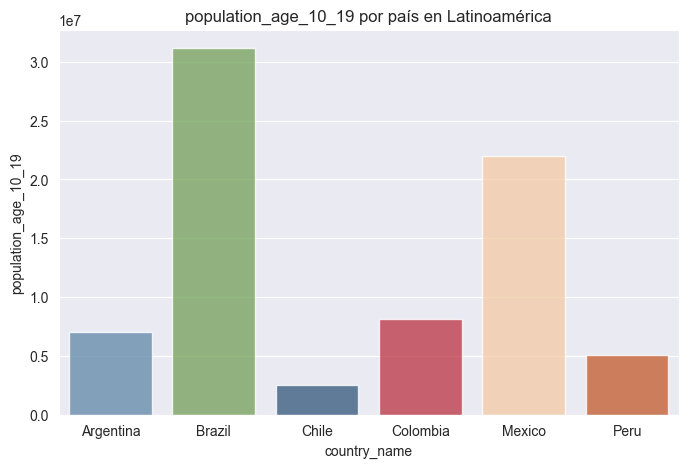

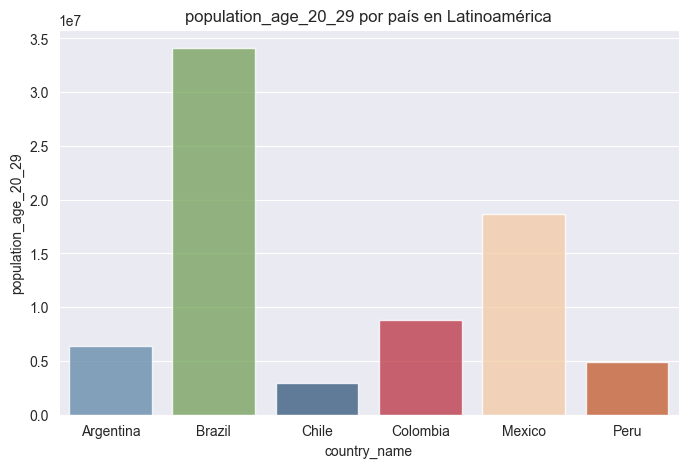

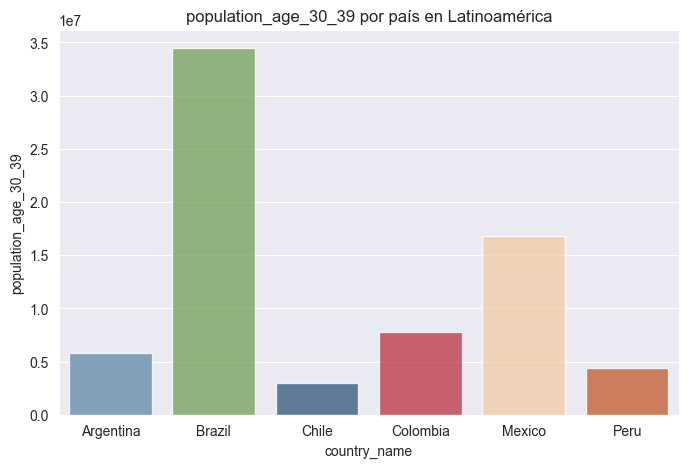

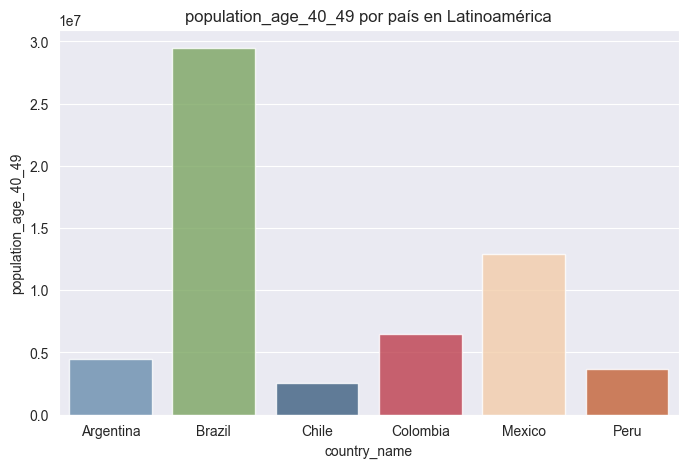

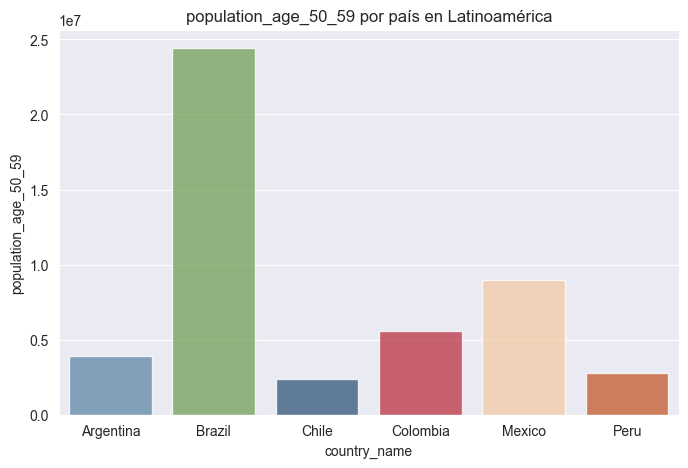

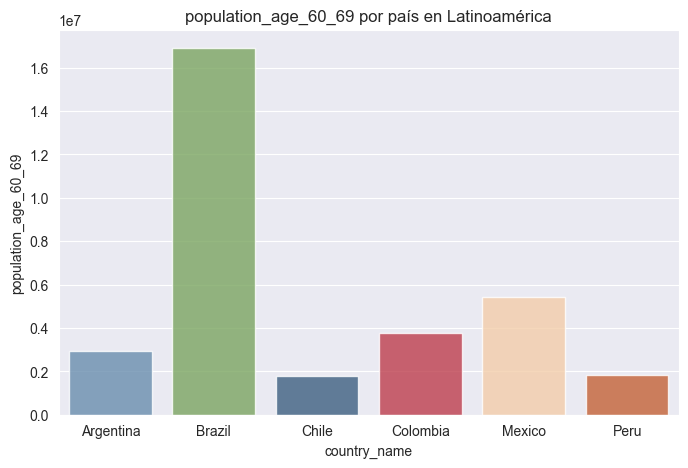

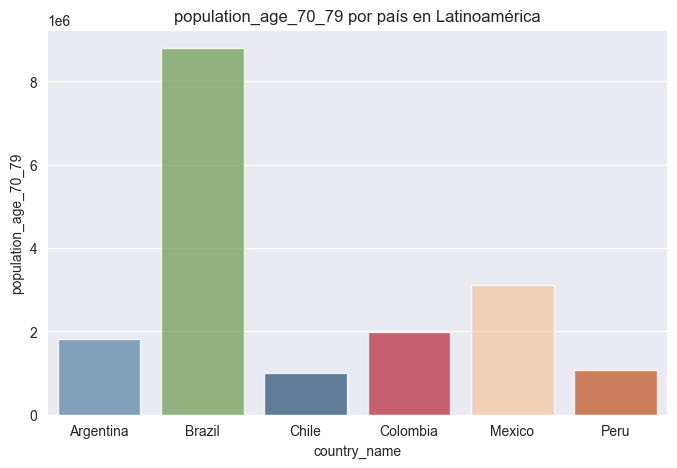

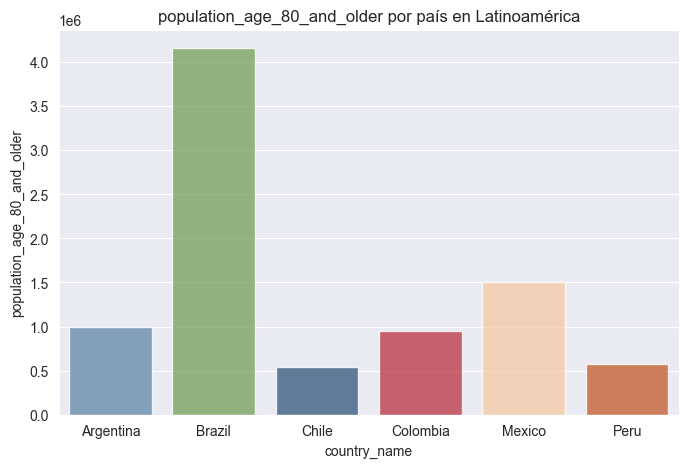

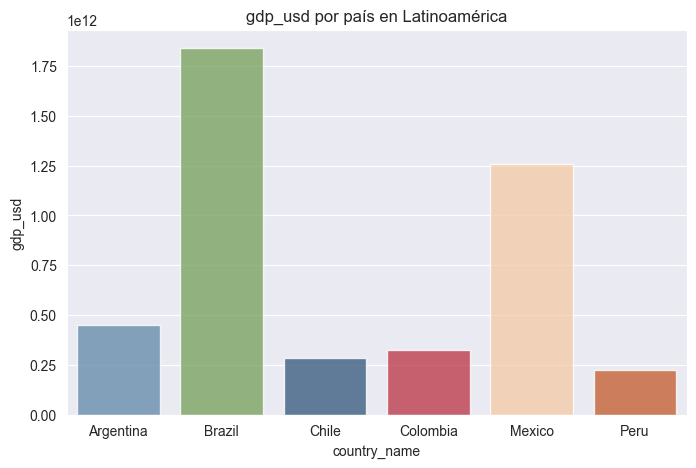

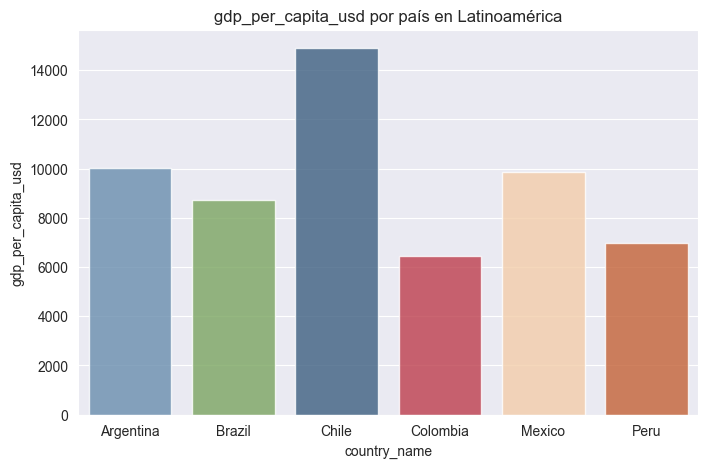

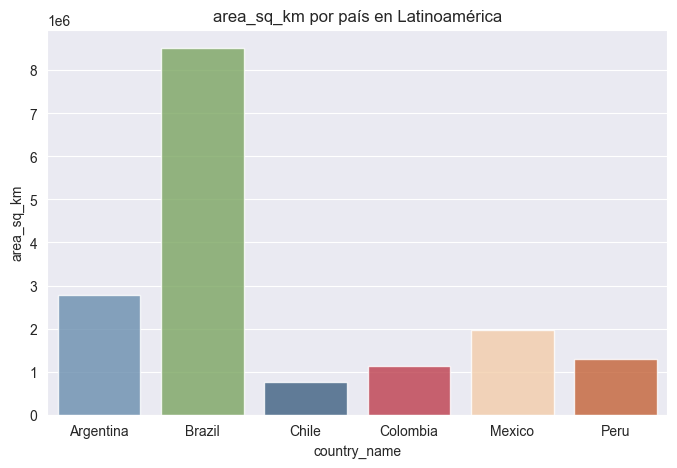

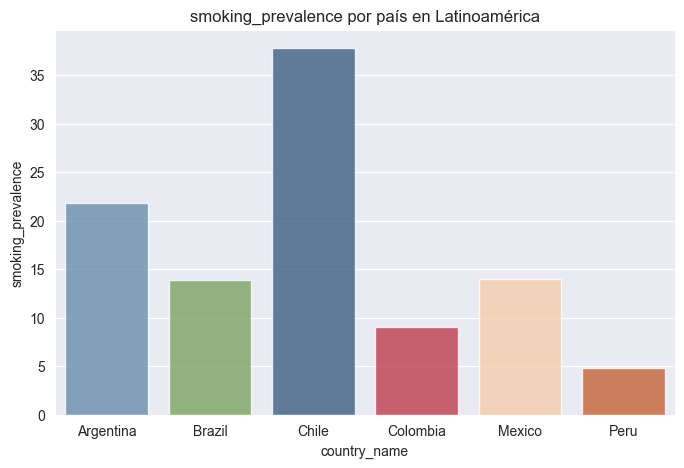

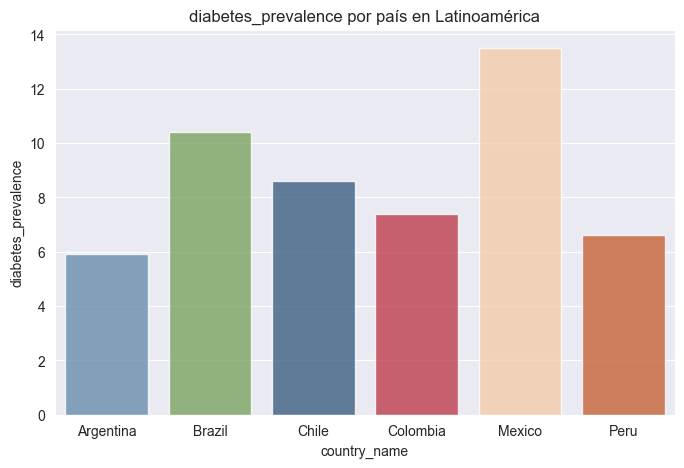

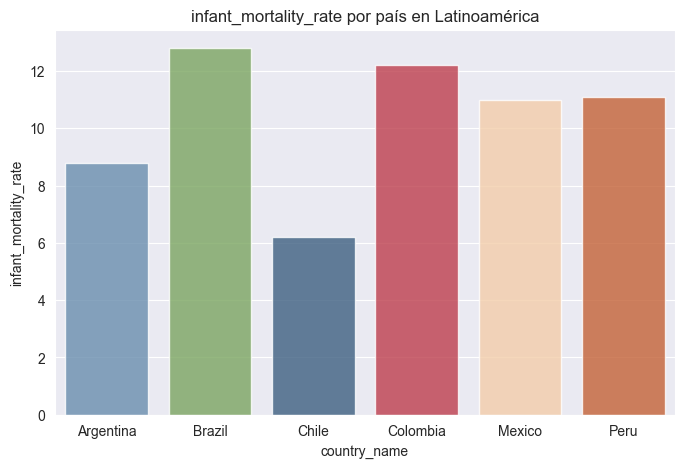

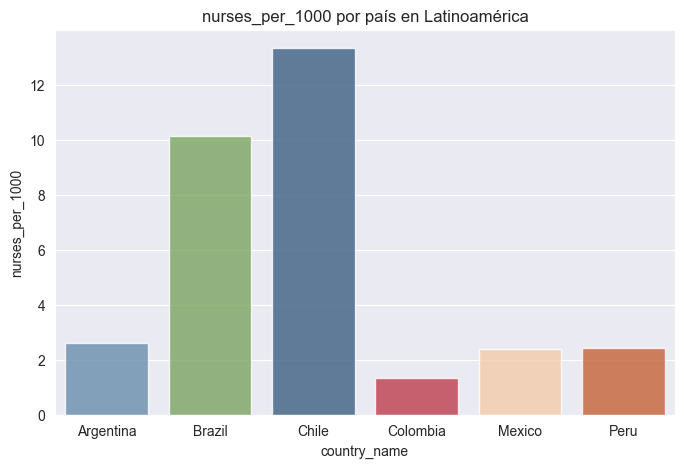

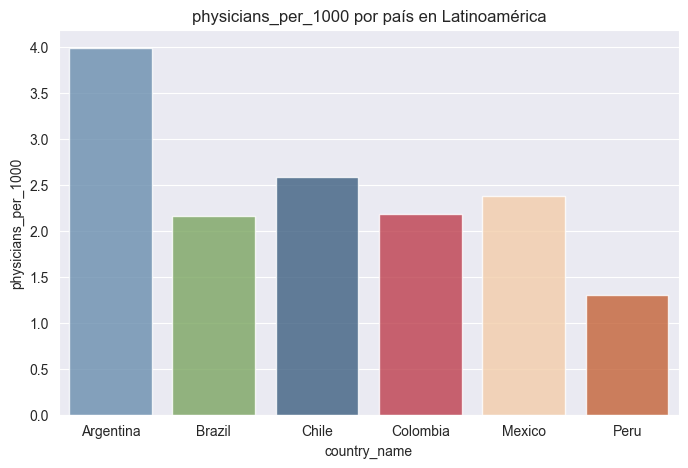

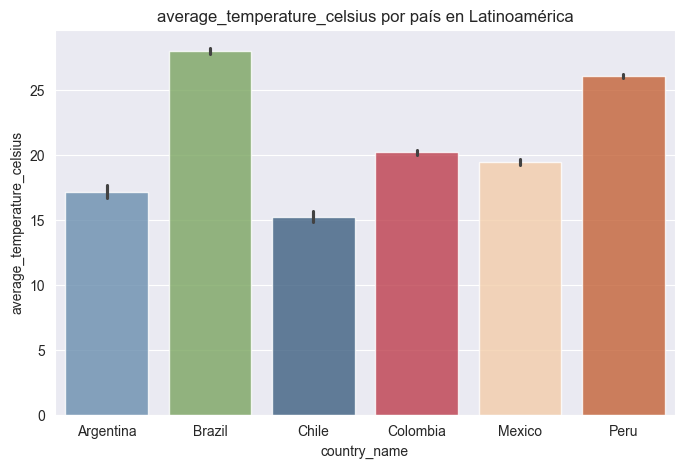

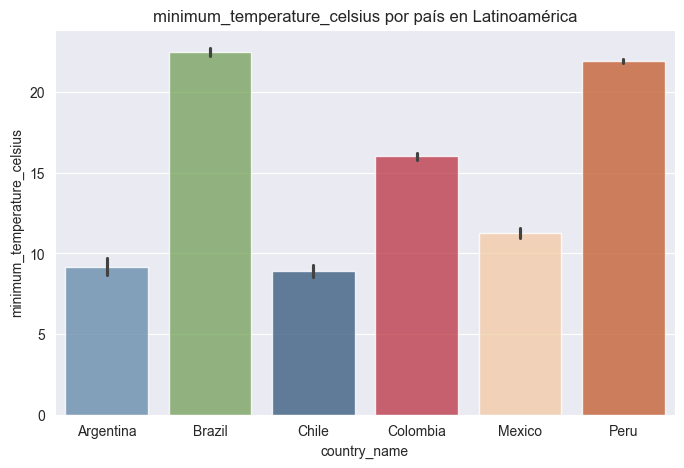

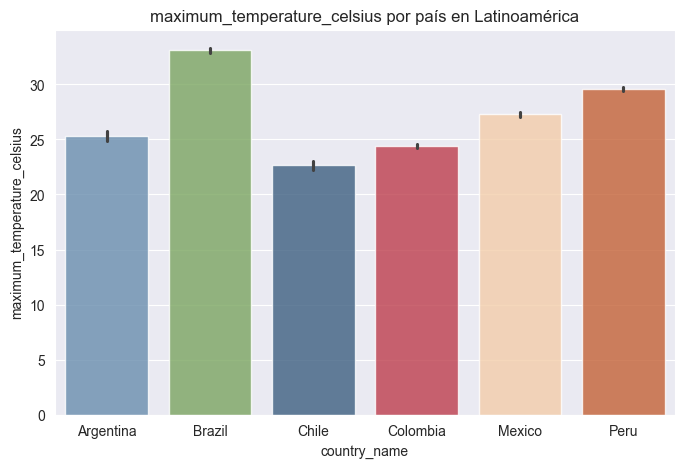

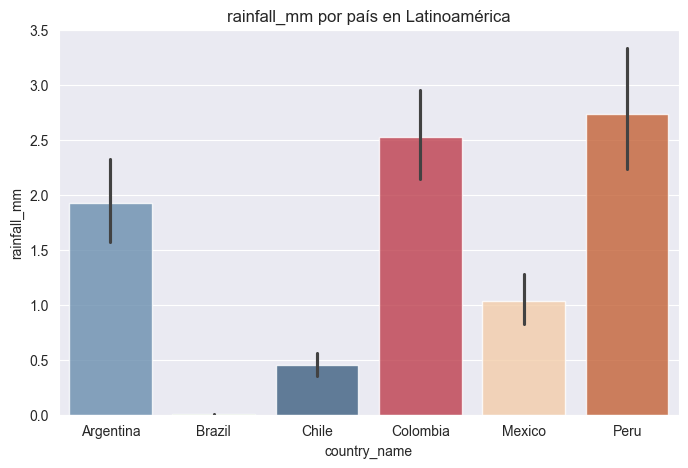

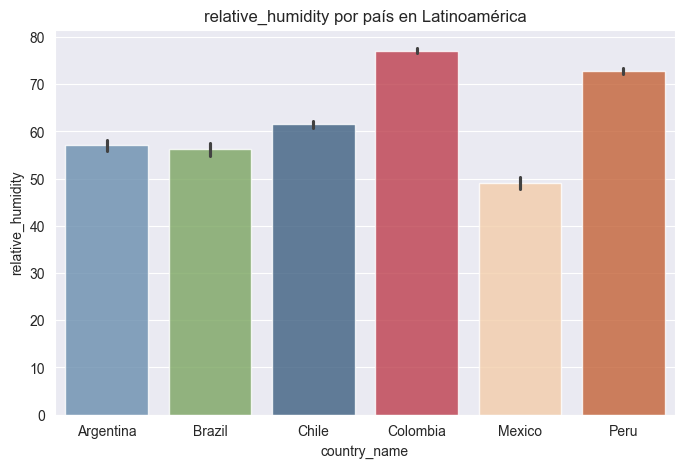

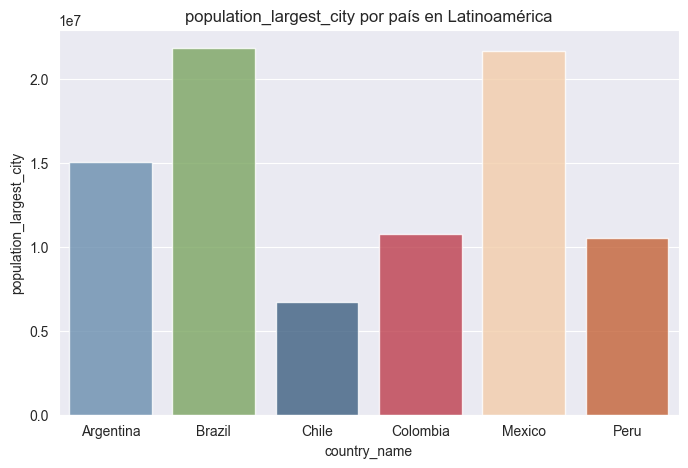

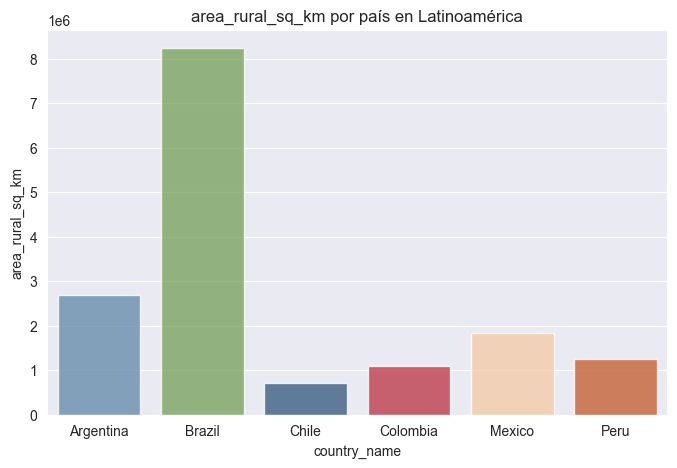

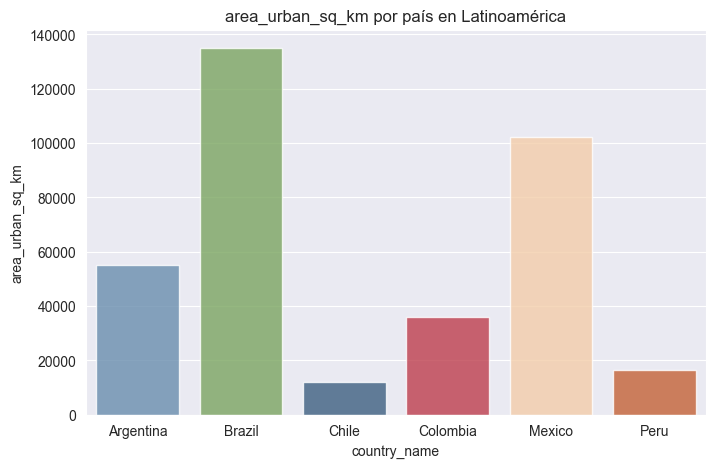

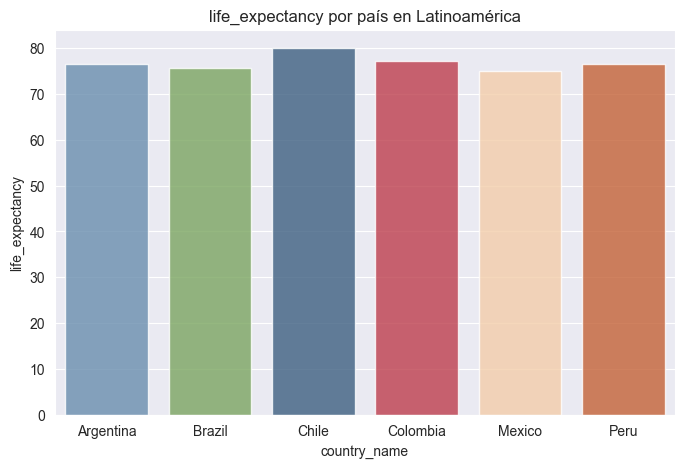

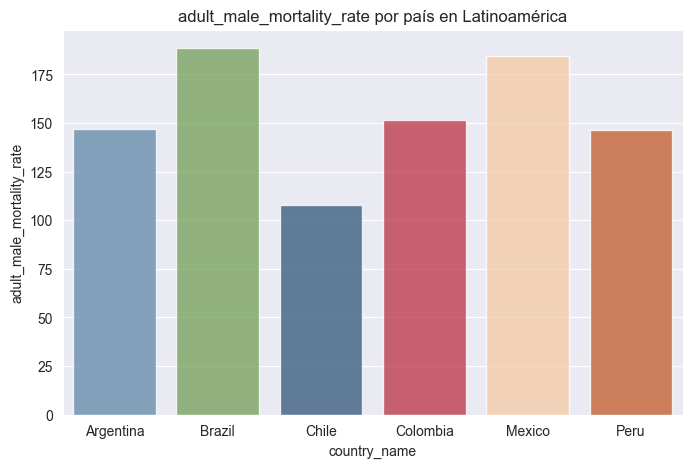

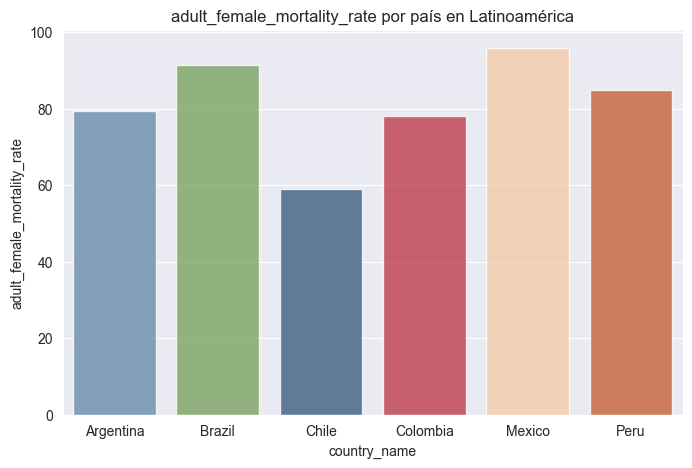

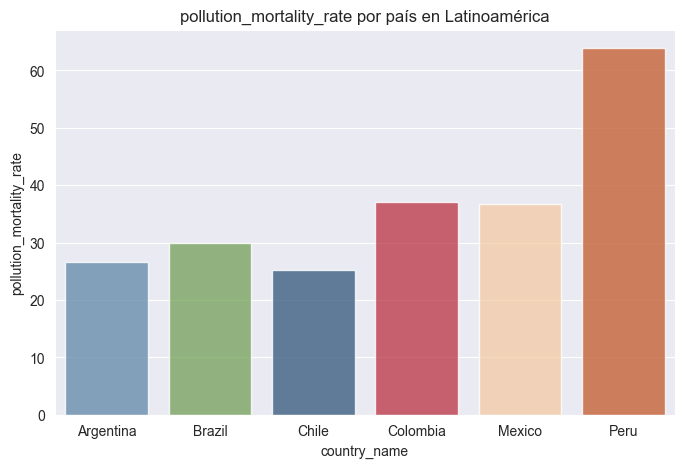

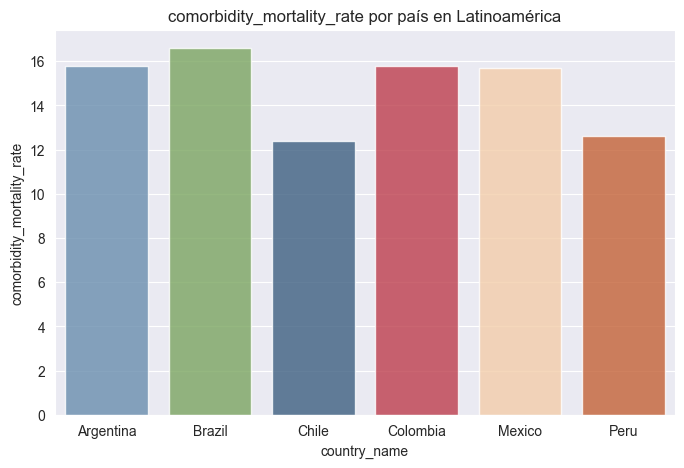

In [ ]:
#iteramos sobre cada columna del dataframe
for i in data_latinoamerica_paises.columns:
    #si la columnas no es una de las siguientes=
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administrated','new_recovered']:
        # Creacion del gráfico
        fig, ax = plt.subplots(figsize=(8, 5)) #creo la figura y sus ejes, ajusto el tamaño del gráfico
        sns.barplot(x='country_name', y=i , data = data_latinoamerica_paises, ax=ax,hue='country_name', palette= mi_paleta, alpha=0.8) #se crea a traves de seaborn un grafico de barra vertical
        sns.set_style('darkgrid') # tipo de letra
        plt.title(f'{i} por país en Latinoamérica')
        plt.show()

 c.-Histogramas de las variables que “Sí” tenga cambios de valores

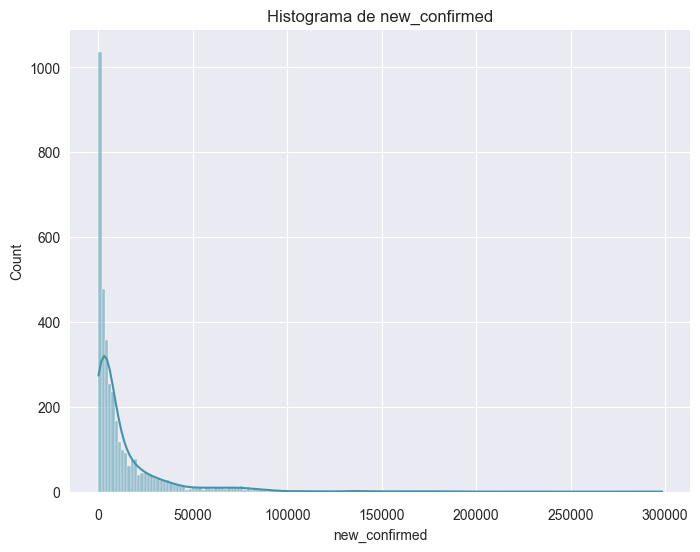

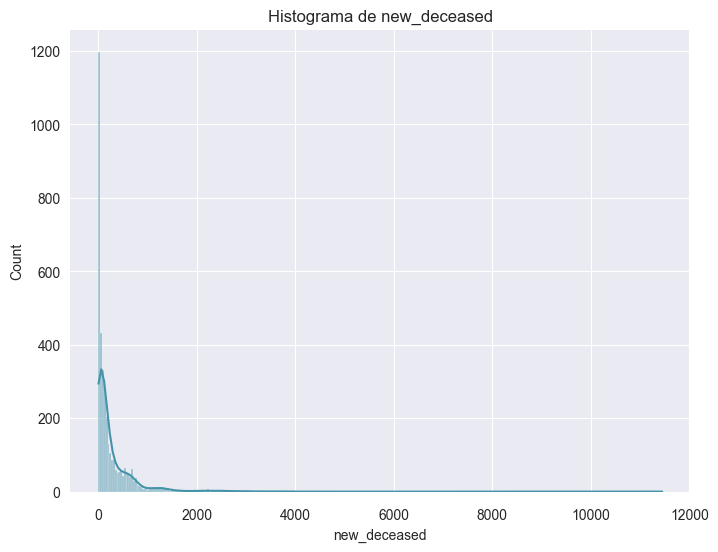

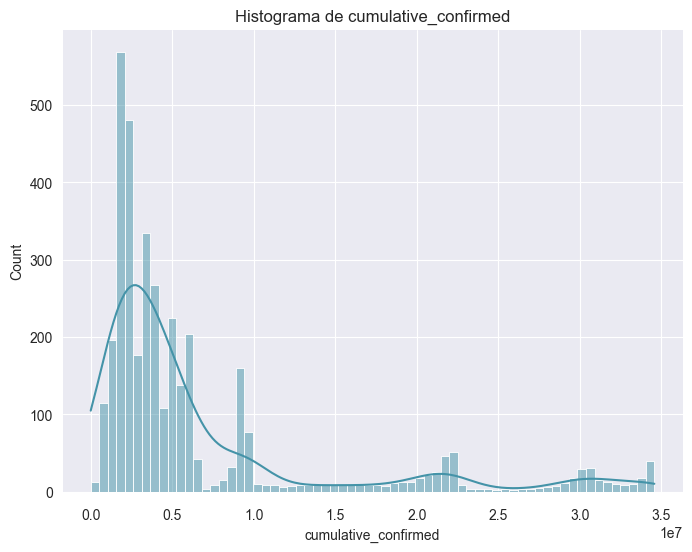

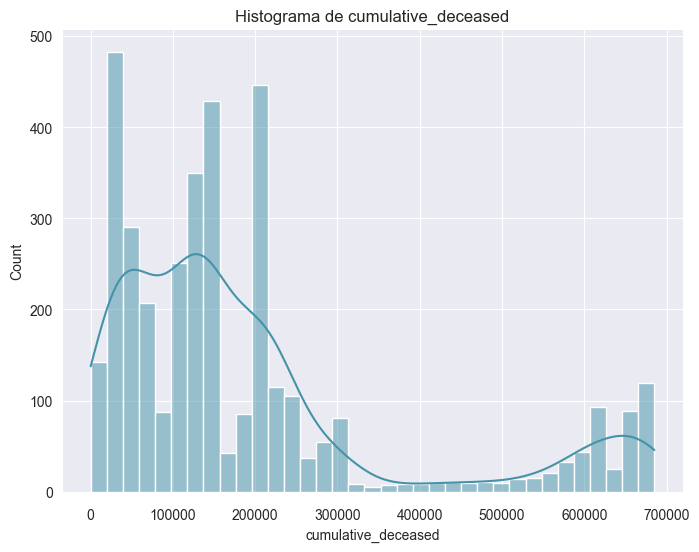

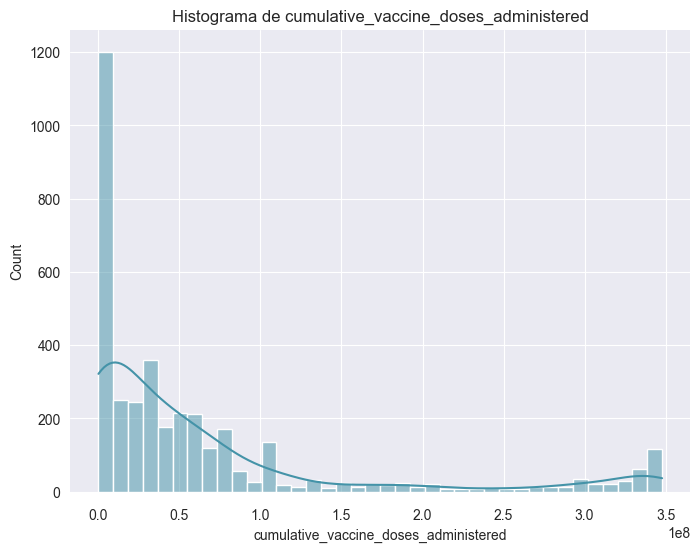

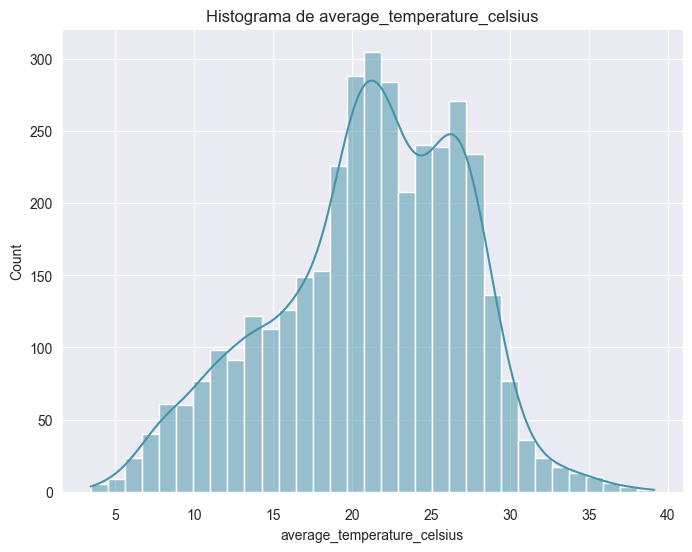

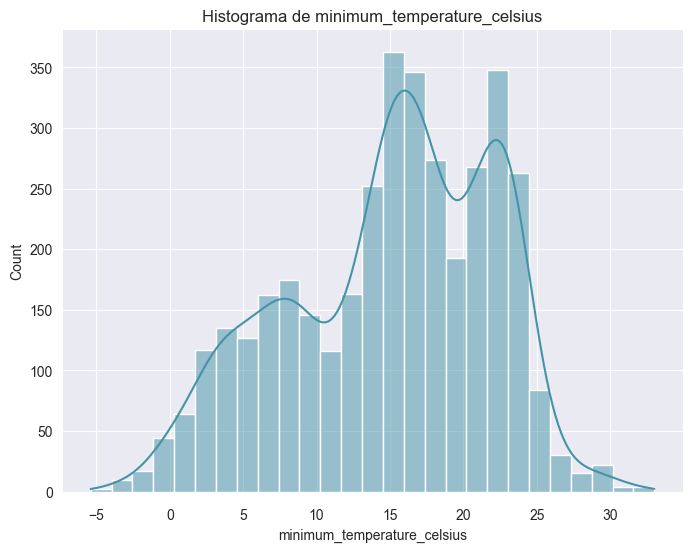

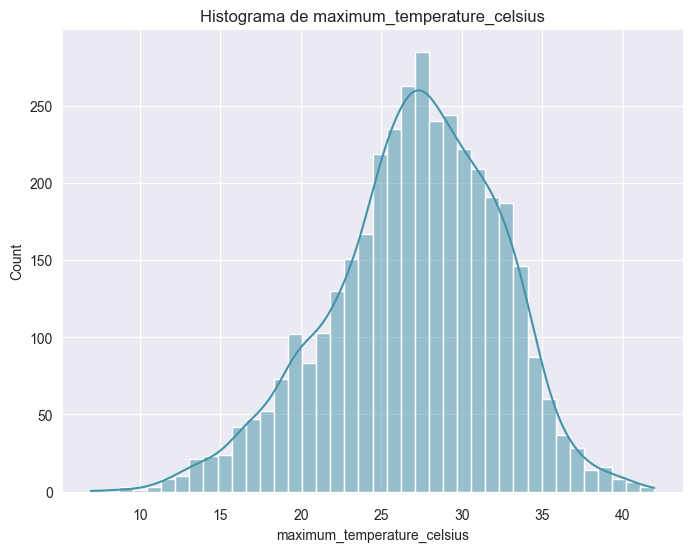

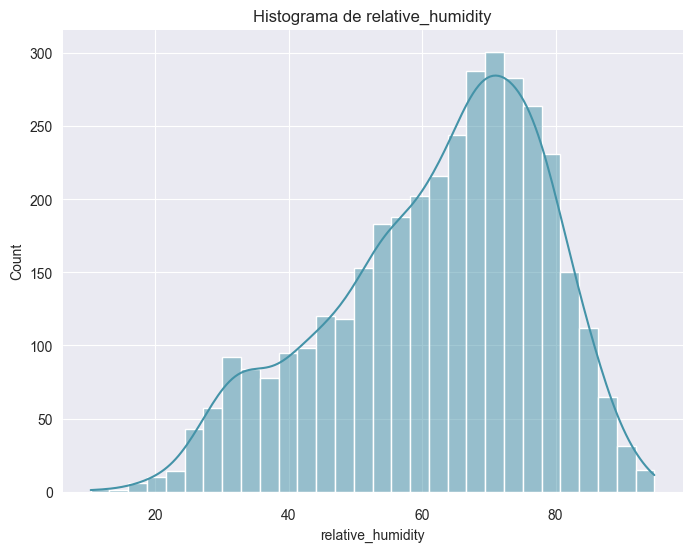

In [ ]:
#defino las columnas que me interesa gráficar el histograma
columnas_histograma=['new_confirmed','new_deceased','cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius','maximum_temperature_celsius','relative_humidity']

#creo el ciclo for que itere de a una columna y genere un histograma 
for i in data_latinoamerica_paises[columnas_histograma]:
    fig, ax = plt.subplots(figsize=(8,6)) #creo la figura y sus ejes, ajusto el tamaño del gráfico
    sns.histplot(data=data_latinoamerica_paises[i], kde=True, color='#4493A8')
    sns.set_style('darkgrid')
    sns.despine(left=True,offset=5,trim=True)
    plt.title(f'Histograma de {i}')
    plt.show()

d.-Diagrama de dispersión de la temperatura media contra los casos confirmados

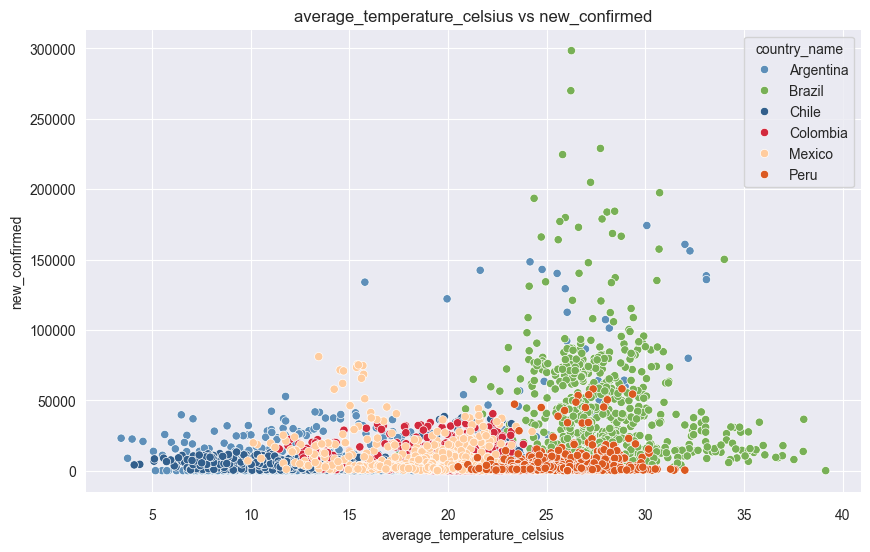

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) #creo la figura y sus ejes, ajusto el tamaño del gráfico
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name', palette=mi_paleta) #creo el gráfico de dispersión
plt.title('average_temperature_celsius vs new_confirmed')
sns.set_style('darkgrid')
sns.despine(left=True,offset=5,trim=True)

plt.show() # Mostramos la gráfica

e.- Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

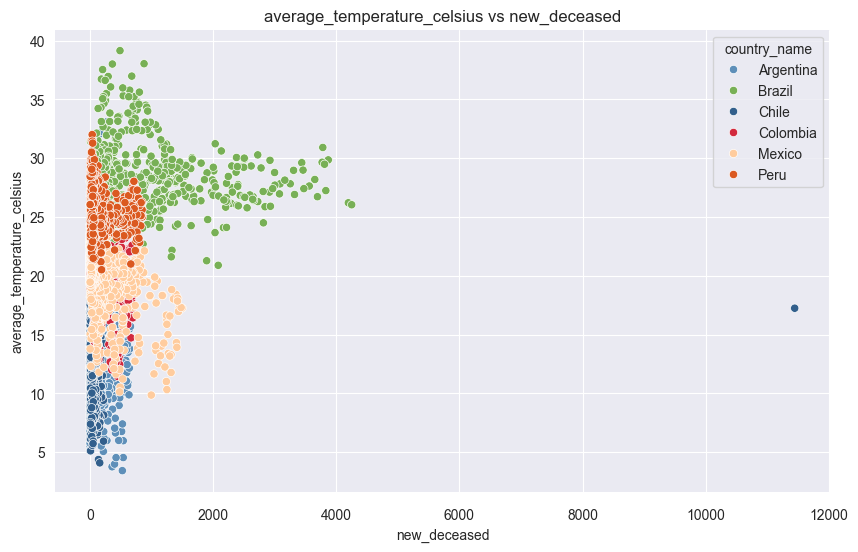

In [ ]:
#se repite la gráfica anterior, pero se modifica la variable de interés.

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y='average_temperature_celsius',x='new_deceased',data=data_latinoamerica_paises, hue='country_name',palette= mi_paleta)
plt.title('average_temperature_celsius vs new_deceased')
sns.set_style('darkgrid')
sns.despine(left=True,offset=5,trim=True)

plt.show()

f.-Comportamiento de las dosis administradas de todos los países (Valor medio).

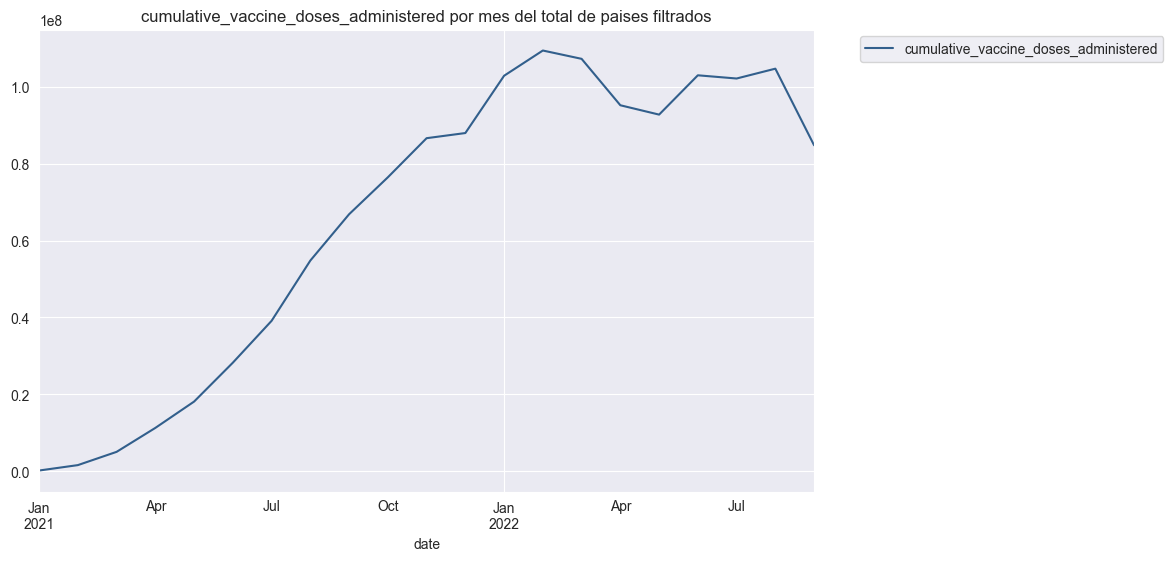

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) #creo la figura y sus ejes, ajusto el tamaño del gráfico

#En esta primer línea estamos "reconfigurando" los datos y pidiendole que agrupe por la media de la columna de manera mensual
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(color='#325F8C') 
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes del total de paises filtrados')
sns.set_style('darkgrid') # Estilo de letra para el título

#Mostramos el gráfico
plt.show()

g.-Evolución de dosis administradas por mes de cada país.

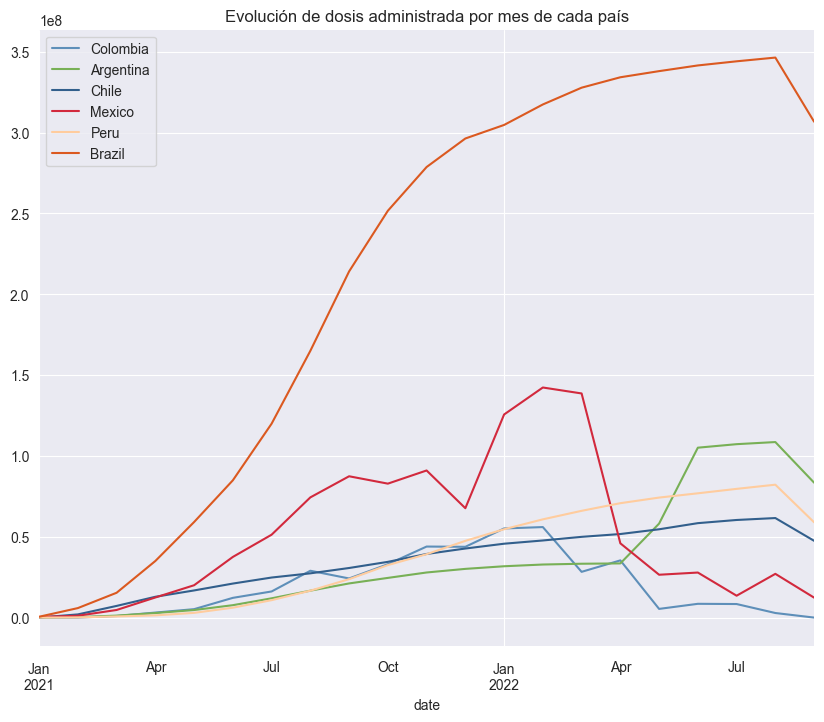

In [ ]:
#Lista los nombres de países que me interesa
paises_6 = ['Colombia','Argentina','Chile','Mexico','Peru','Brazil']

fig, ax = plt.subplots(figsize=(10,8) )#creo la figura y sus ejes, ajusto el tamaño del gráfico

# Bucle para iterar sobre los países y trazar la evolución de dosis administradas por mes para cada uno
for i,pais in enumerate(paises_6):
    # Filtro el DataFrame para obtener solo los datos del país actual y luego realizar un promedio mensual de las dosis administradas
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(color=sns.color_palette(mi_paleta)[i])


plt.title('Evolución de dosis administrada por mes de cada país') # Agrego título al gráfico
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') # Agrego leyenda al gráfico, ajustando la posición
plt.legend(paises_6) # Agrego leyenda con los nombres de los países

sns.set_style('darkgrid') #Establesco el estilo de la trama del gráfico
sns.despine(left=True,offset=5,trim=True) # Configuro ejes de la trama y ajusto los márgenes

plt.show() #Mostramos el gráfico

 h.- Muertes por mes de cada país.

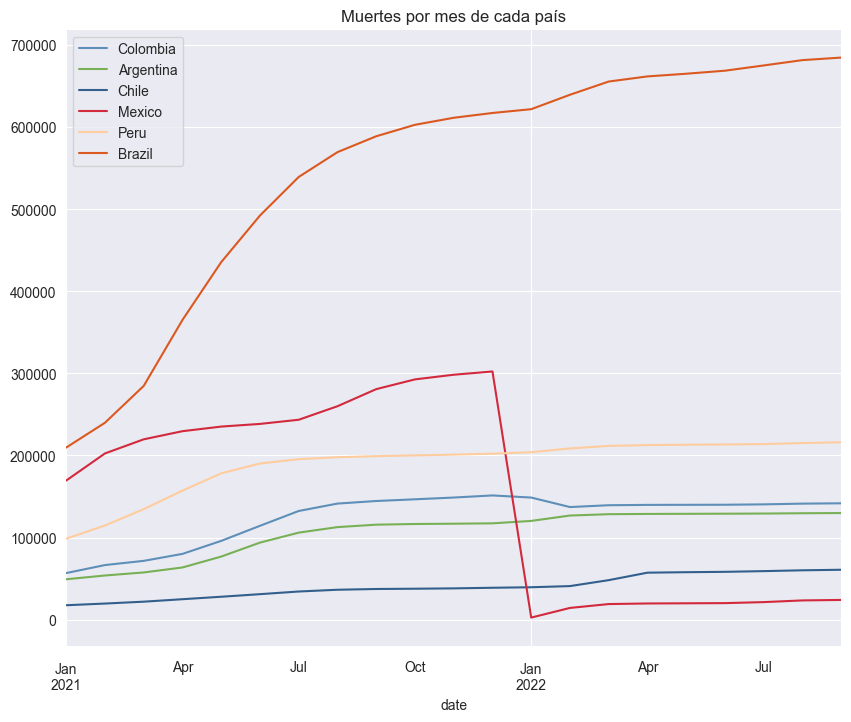

In [ ]:
fig, ax = plt.subplots(figsize=(10,8) )#creo la figura y sus ejes, ajusto el tamaño del gráfico

# Bucle para iterar sobre los países y trazar la evolución de dosis administradas por mes para cada uno
for i,pais in enumerate(paises_6):
    # Filtro el DataFrame para obtener solo los datos del país actual y luego realizar un promedio mensual de las dosis administradas
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot(color=sns.color_palette(mi_paleta)[i])


plt.title('Muertes por mes de cada país') # Agrego título al gráfico
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') # Agrego leyenda al gráfico, ajustando la posición
plt.legend(paises_6) # Agrego leyenda con los nombres de los países

sns.set_style('darkgrid') #Establesco el estilo de la trama del gráfico
sns.despine(left=True,offset=5,trim=True) # Configuro ejes de la trama y ajusto los márgenes

plt.show() #Mostramos el gráfico

i.- Casos confirmados por mes de cada país.

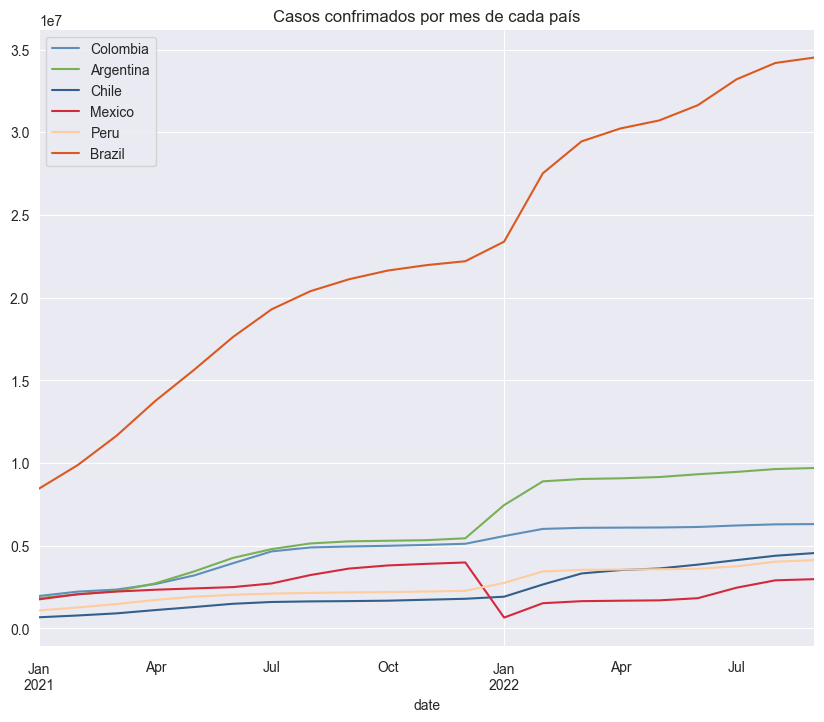

In [ ]:
fig, ax = plt.subplots(figsize=(10,8) )#creo la figura y sus ejes, ajusto el tamaño del gráfico

# Bucle para iterar sobre los países y trazar la evolución de dosis administradas por mes para cada uno
for i,pais in enumerate(paises_6):
    # Filtro el DataFrame para obtener solo los datos del país actual y luego realizar un promedio mensual de las dosis administradas
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot(color=sns.color_palette(mi_paleta)[i])


plt.title('Casos confrimados por mes de cada país') # Agrego título al gráfico
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') # Agrego leyenda al gráfico, ajustando la posición
plt.legend(paises_6) # Agrego leyenda con los nombres de los países

sns.set_style('darkgrid') #Establesco el estilo de la trama del gráfico
sns.despine(left=True,offset=5,trim=True) # Configuro ejes de la trama y ajusto los márgenes

plt.show() #Mostramos el gráfico

j.- Recuperaciones de casos por mes de cada país.

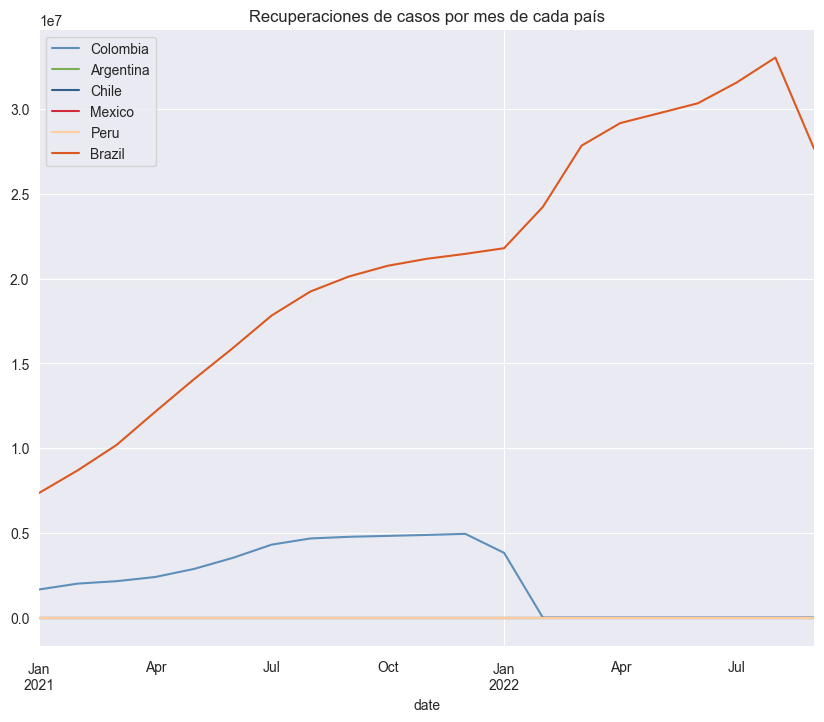

In [ ]:
fig, ax = plt.subplots(figsize=(10,8) )#creo la figura y sus ejes, ajusto el tamaño del gráfico

# Bucle para iterar sobre los países y trazar la evolución de dosis administradas por mes para cada uno
for i,pais in enumerate(paises_6):
    # Filtro el DataFrame para obtener solo los datos del país actual y luego realizar un promedio mensual de las dosis administradas
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot(color=sns.color_palette(mi_paleta)[i])


plt.title('Recuperaciones de casos por mes de cada país') # Agrego título al gráfico
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') # Agrego leyenda al gráfico, ajustando la posición
plt.legend(paises_6) # Agrego leyenda con los nombres de los países

sns.set_style('darkgrid') #Establesco el estilo de la trama del gráfico
sns.despine(left=True,offset=5,trim=True) # Configuro ejes de la trama y ajusto los márgenes

plt.show() #Mostramos el gráfico

k.-Comparación del Número de Casos Nuevos entre Países.

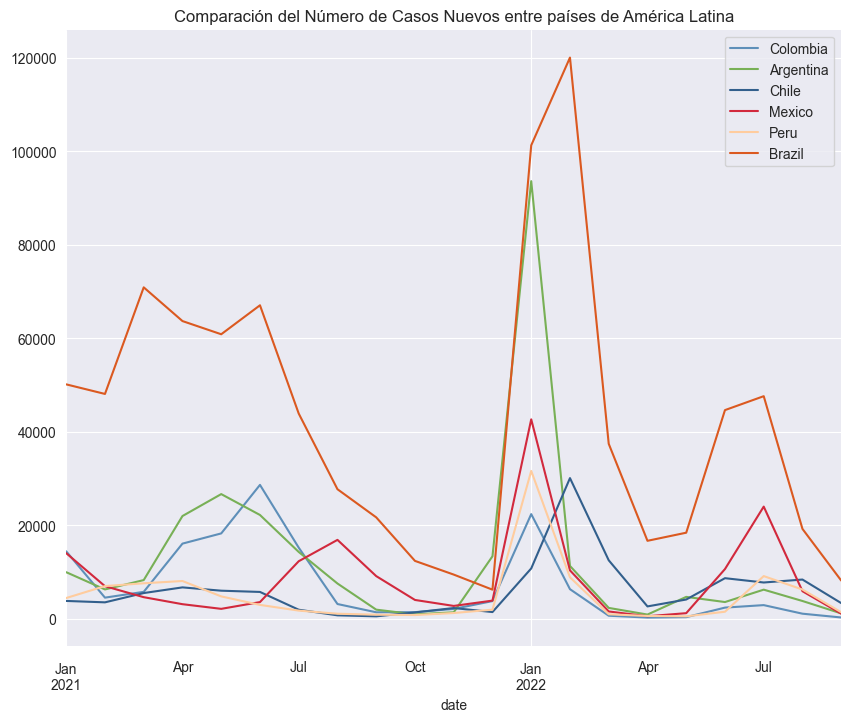

In [ ]:
fig, ax = plt.subplots(figsize=(10,8) )#creo la figura y sus ejes, ajusto el tamaño del gráfico

# Bucle para iterar sobre los países y trazar la evolución de dosis administradas por mes para cada uno
for i,pais in enumerate(paises_6):
    # Filtro el DataFrame para obtener solo los datos del país actual y luego realizar un promedio mensual de las dosis administradas
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot(color=sns.color_palette(mi_paleta)[i])


plt.title('Comparación del Número de Casos Nuevos entre países de América Latina') # Agrego título al gráfico
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') # Agrego leyenda al gráfico, ajustando la posición
plt.legend(paises_6) # Agrego leyenda con los nombres de los países

sns.set_style('darkgrid') #Establesco el estilo de la trama del gráfico
sns.despine(left=True,offset=5,trim=True) # Configuro ejes de la trama y ajusto los márgenes

plt.show() #Mostramos el gráfico

l.- Dosis acumuladas por país.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

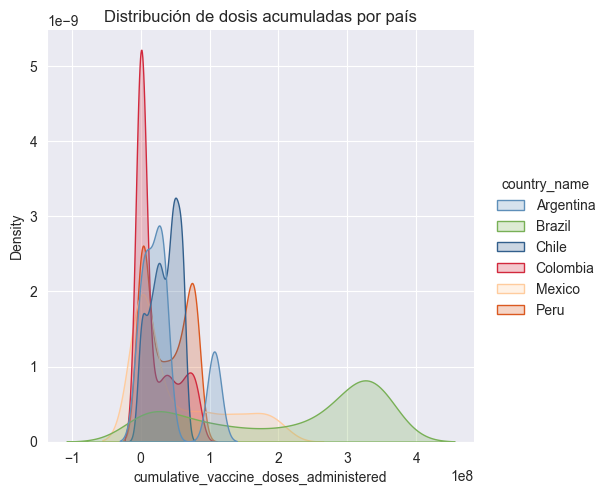

In [ ]:
sns.displot(data_latinoamerica_paises, x='cumulative_vaccine_doses_administered',hue='country_name', kind='kde', fill=True ,palette=mi_paleta)
plt.title('Distribución de dosis acumuladas por país')

m.- Boxplot de temperatura media de cada país.

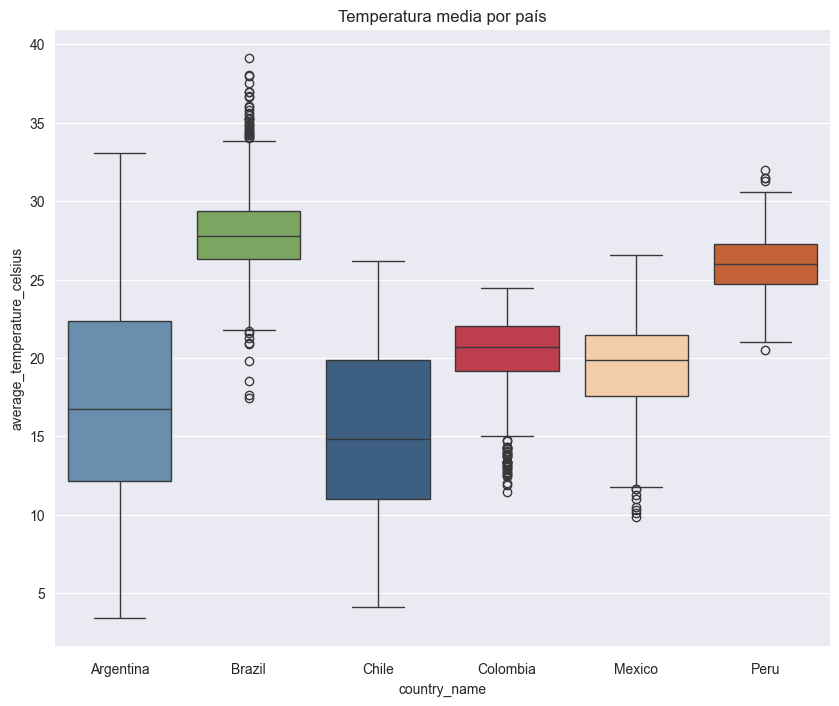

In [ ]:
#Creamos la figura
fig, ax = plt.subplots(figsize=(10,8)) # Definimos el tamaño de la grafica y el estilo de letra 
sns.set_style('darkgrid')

sns.boxplot(data=data_latinoamerica_paises, x='country_name', y='average_temperature_celsius', hue='country_name', palette=mi_paleta) # tipo de grafico y la distribucion en sus ejes

sns.set_style('darkgrid')
sns.despine(left=True,offset=5,trim=True) # Ajustamos el estilo de los ejes, eliminado los bordes
plt.title('Temperatura media por país')
plt.show() #Mostramos la gráfica

n.-Violinplot de las variables que “Sí” tenga cambios de valores.

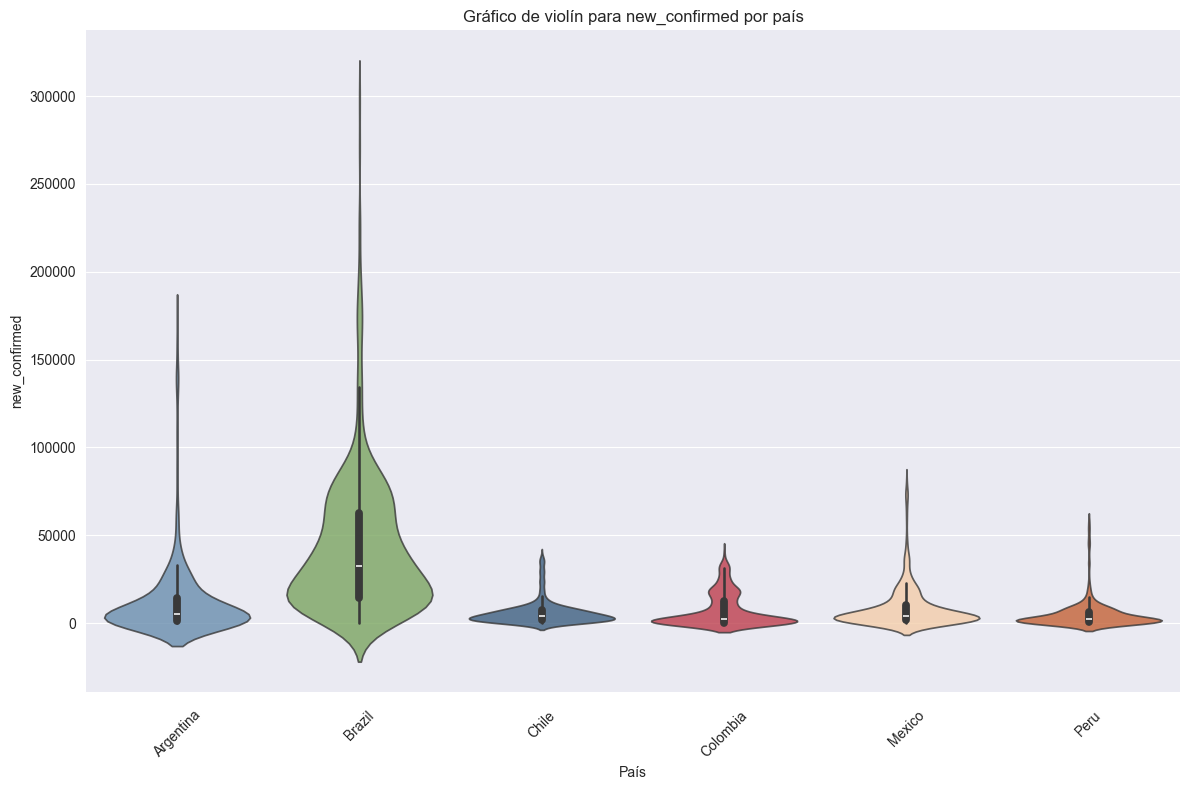

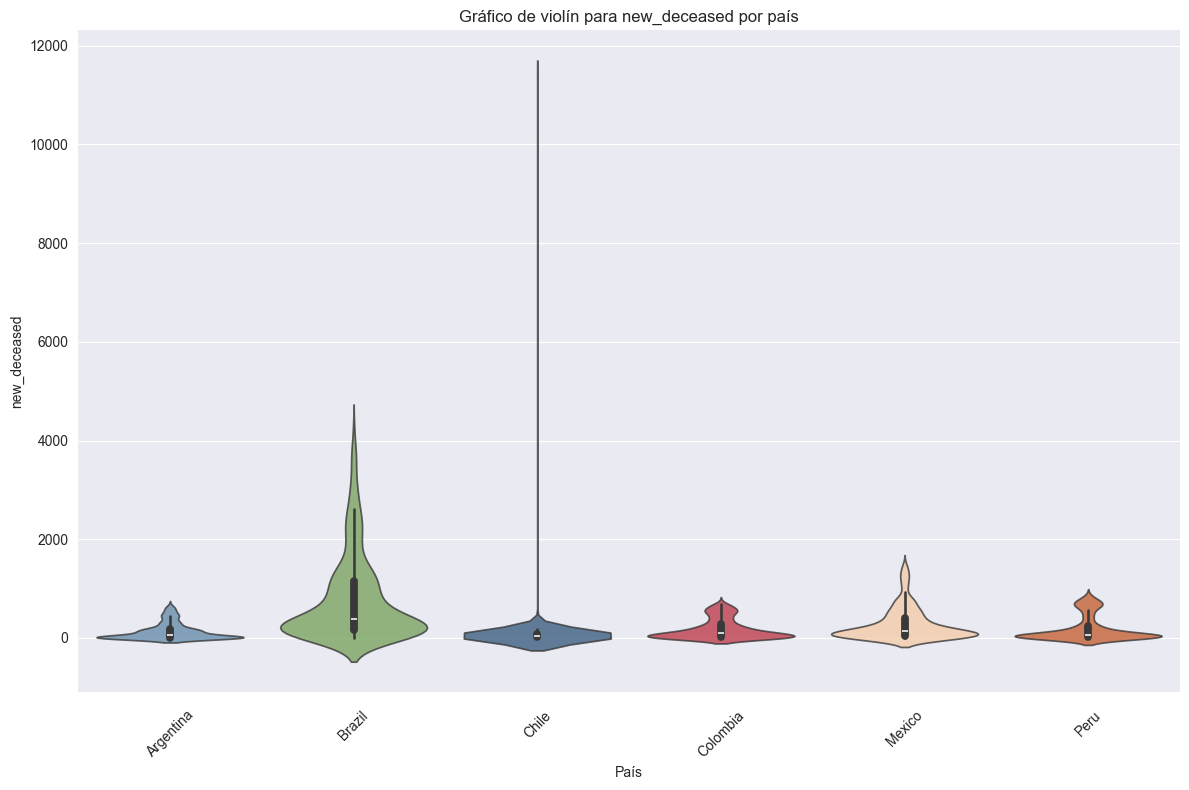

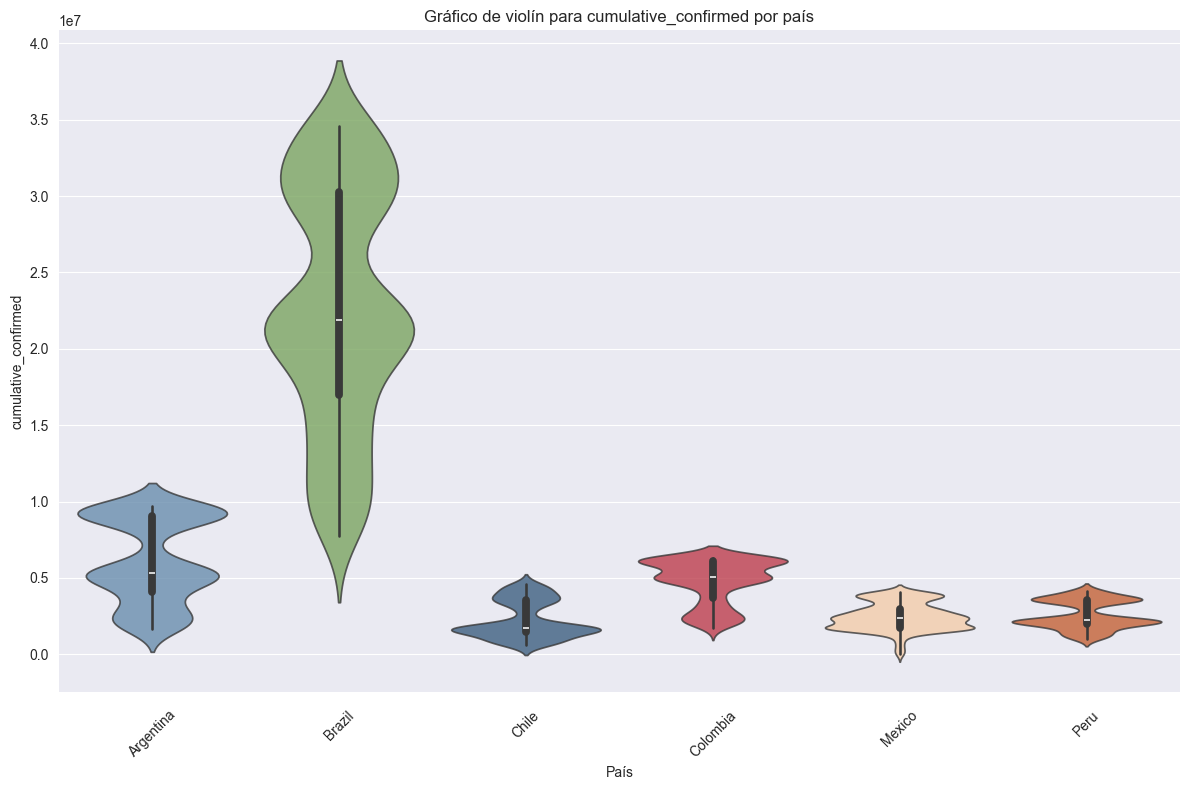

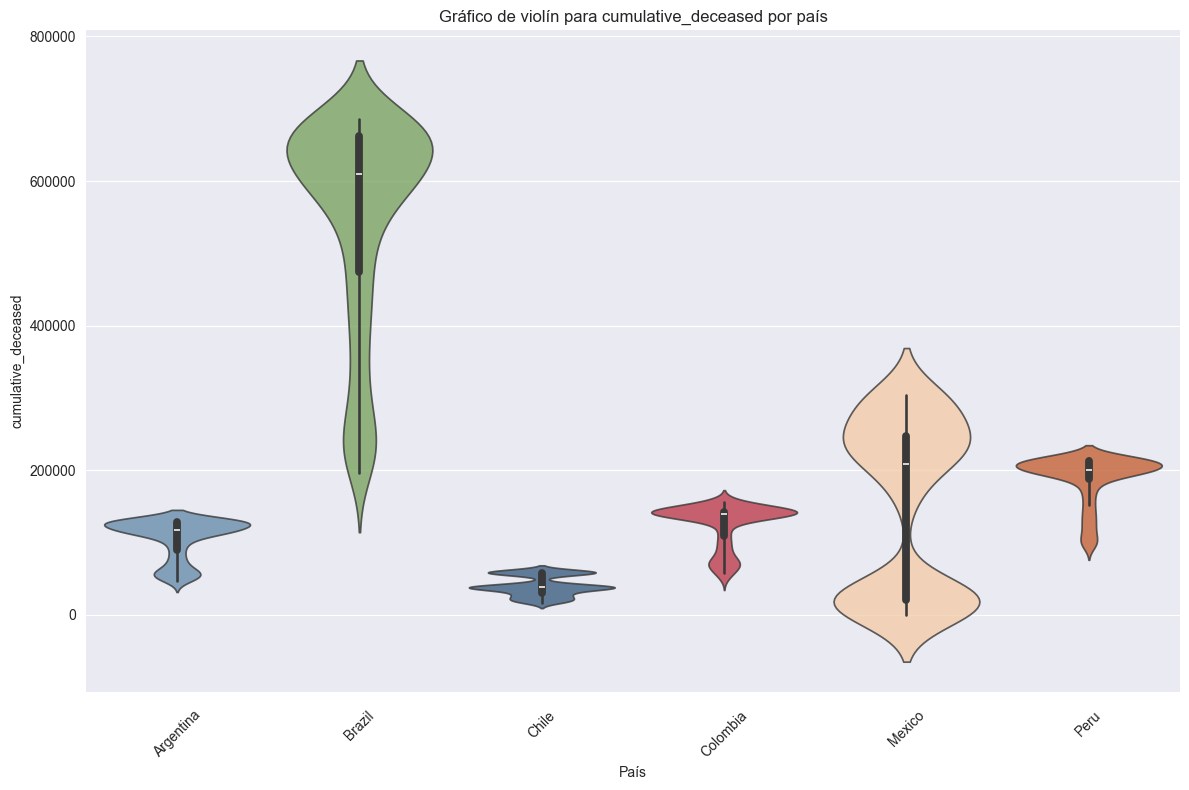

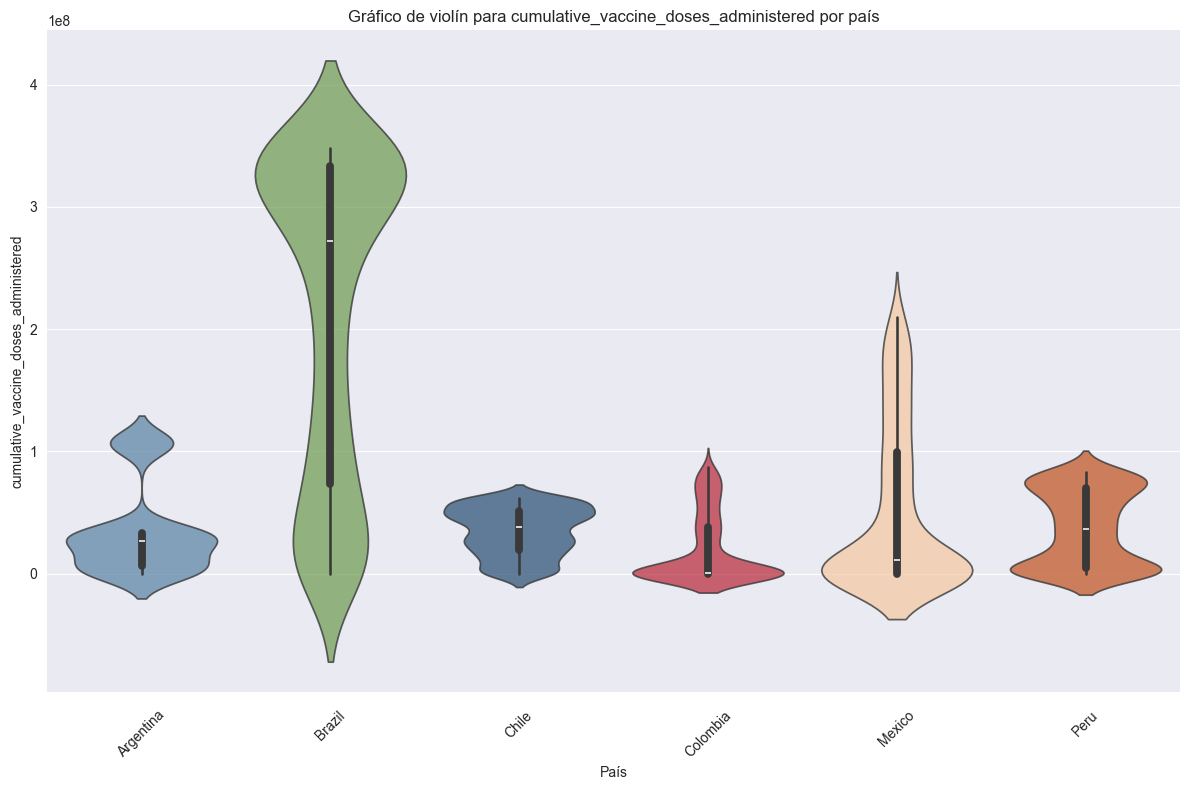

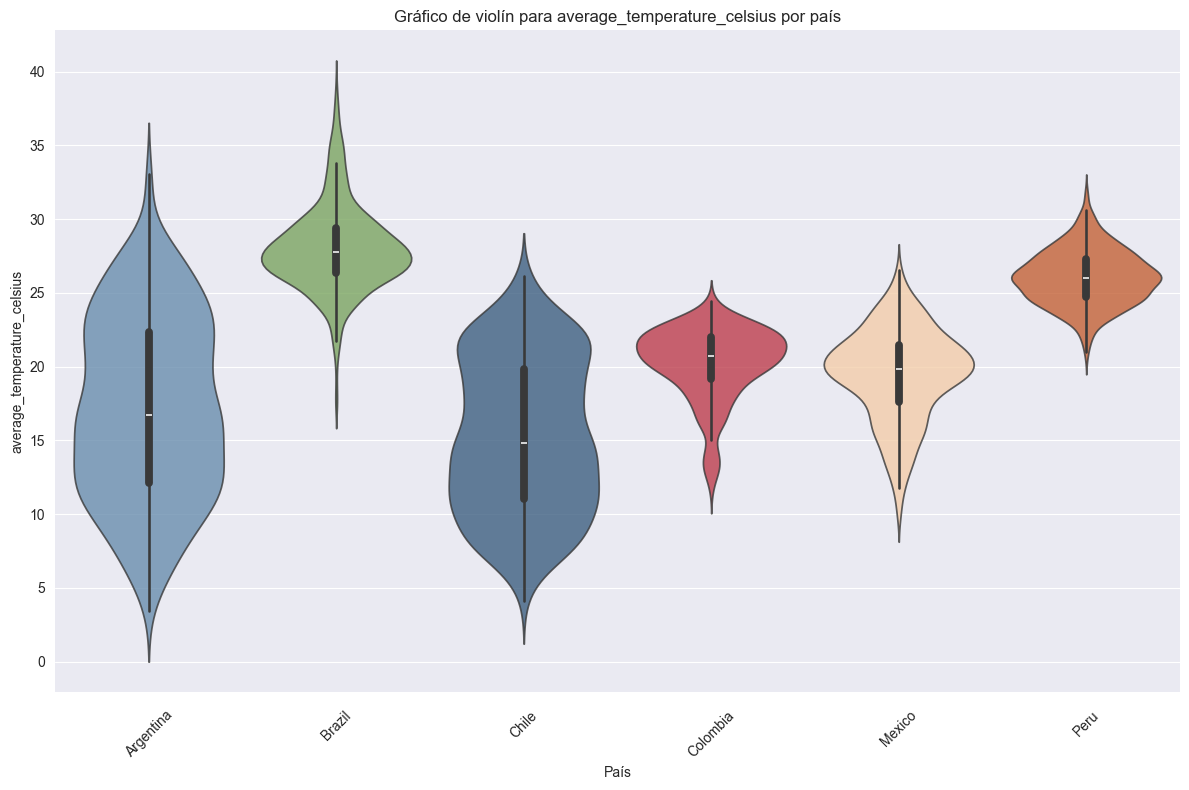

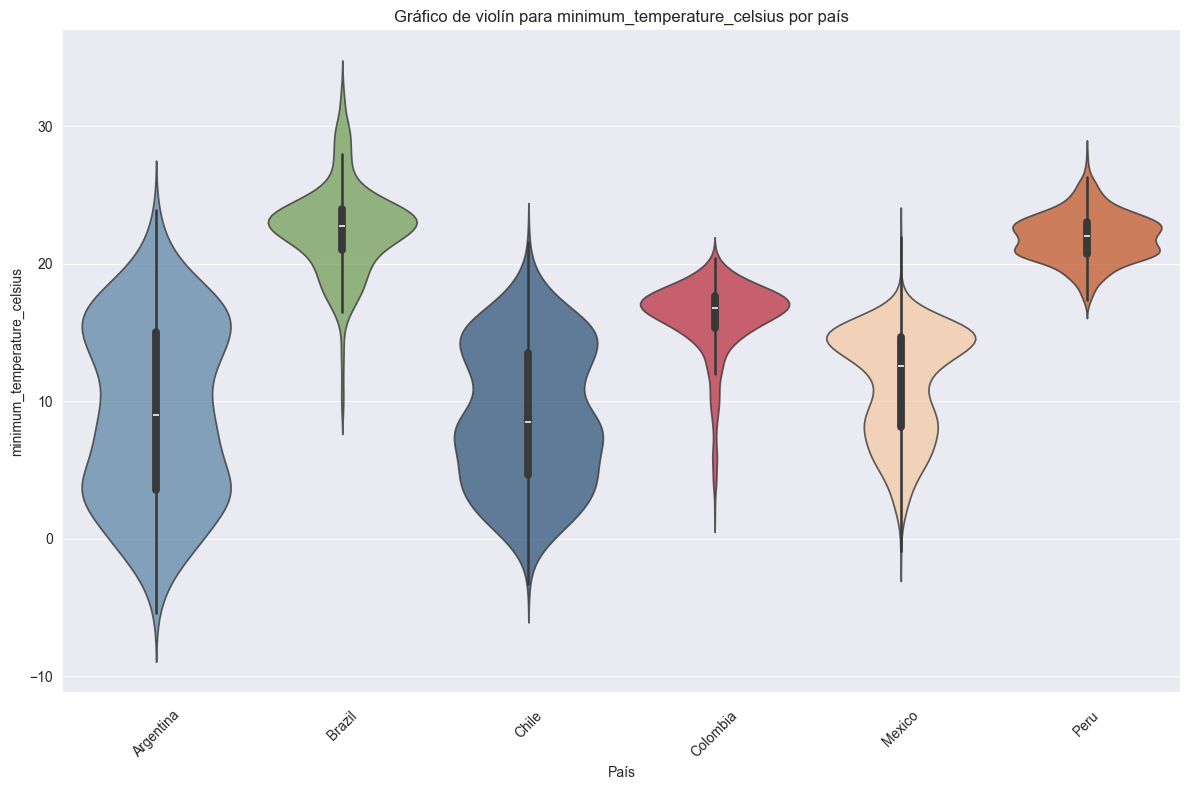

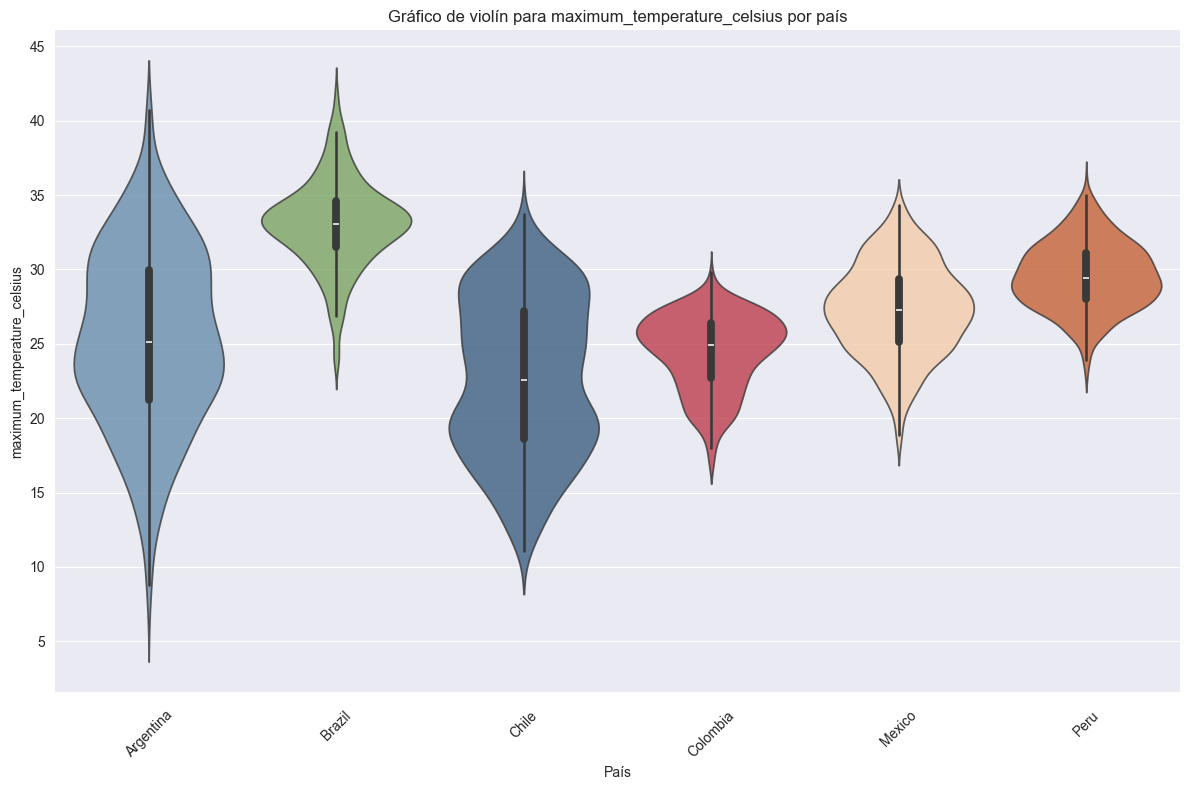

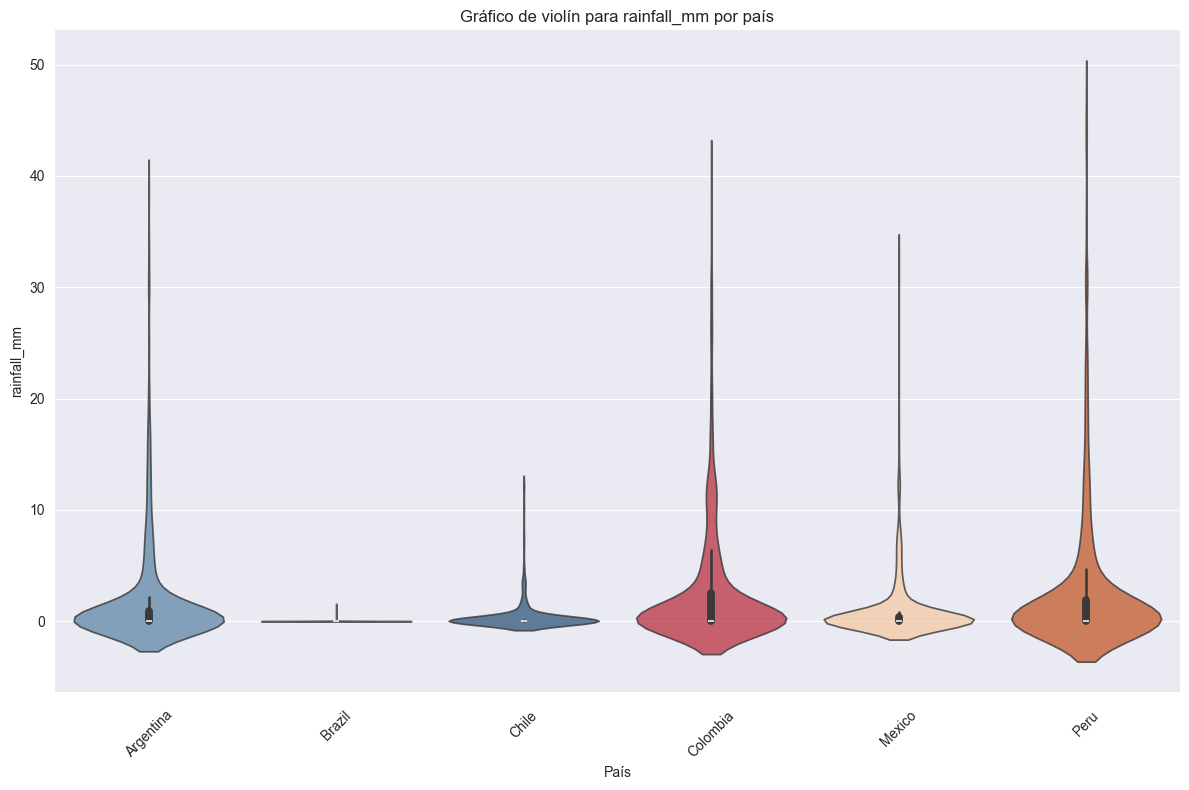

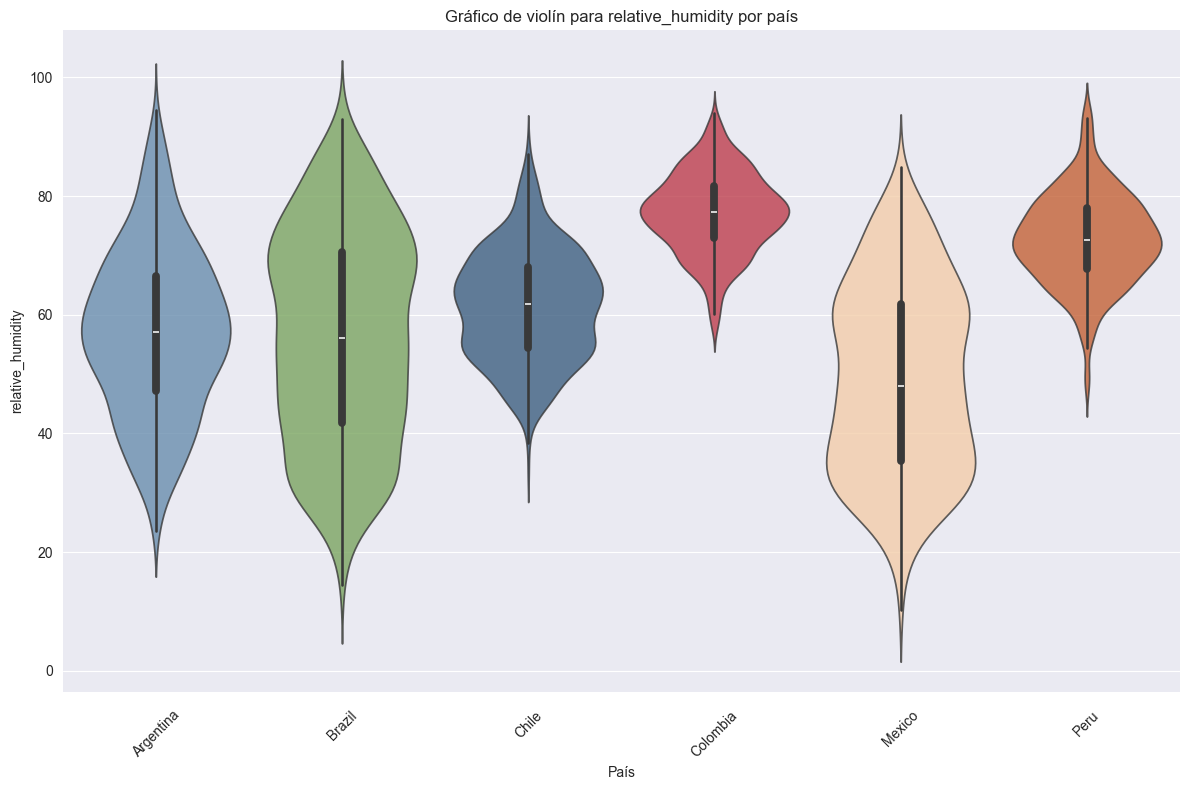

In [ ]:
#Definimos una lista con las columnas a realizar el gráfico
columnas_violin = ['new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered','average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity']

# Creamos un gráfico de violín para cada columna
for columna in columnas_violin:
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=data_latinoamerica_paises, x='country_name', y=columna, hue='country_name', palette=mi_paleta, alpha=0.8)
    plt.title(f'Gráfico de violín para {columna} por país')
    plt.ylabel(columna)
    plt.xlabel('País')
    sns.set_style('darkgrid')
    sns.despine(left=True,offset=5,trim=True)

    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mayor legibilidad
    plt.tight_layout() #Ajustamos las figuras dentro del gráfico para que no se superpongan
    plt.show() #Mostramos las gráfcias

ñ.-Distribución de la población por grupos de edad.

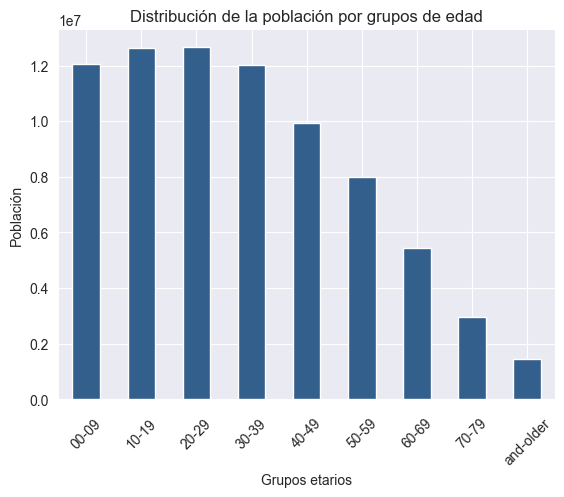

In [ ]:
# creo una lista con el grupo de edades
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69', 'population_age_70_79','population_age_80_and_older']
distribucion_edades = data_latinoamerica_paises[columnas_edad].mean()

distribucion_edades.plot(kind='bar',stacked=True, color='#325F8C') # Este DF de tipo pandas que lo grafique con barras (bar) y lo vaya pasando de grupo en grupo con (stacke=True)

plt.title('Distribución de la población por grupos de edad')
plt.xlabel('Grupos etarios')
plt.ylabel('Población')
sns.set_style('darkgrid') # Tipo de letra para el título
sns.despine(left=True,offset=5,trim=True) # ajuste del estilo de los ejes de la gráfica

plt.xticks(range(len(columnas_edad)), [col.split('_')[-2] +'-' +col.split('_')[-1] for col in columnas_edad], rotation=45) # Configuramos las etiquetas de los grupos etarios para que solo queden con los numeros (Ej.:00-09)
plt.show() #Mostramos la gráfica

###### O.- Creacion de gráficos por pais pra cada grupo de edad.

In [ ]:
#Grupo etareo mas vacunados
data_latinoamerica_paises['population_age_00_09']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_29']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_49']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_69']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_10_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_29_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_30_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_49_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_50_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_69_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_70_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered' ]*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_29_vacunados']=data_latinoamerica_paises['population_age_20_29_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_49_vacunados']=data_latinoamerica_paises['population_age_40_49_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_69_vacunados']=data_latinoamerica_paises['population_age_60_69_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_29_vacunados']=data_latinoamerica_paises['population_age_20_29_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_49_vacunados']=data_latinoamerica_paises['population_age_40_49_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_69_vacunados']=data_latinoamerica_paises['population_age_60_69_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_29_vacunados'].sum()
data_latinoamerica_paises['population_age_40_49_vacunados'].sum()
data_latinoamerica_paises['population_age_60_69_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()


np.int64(4877769887)

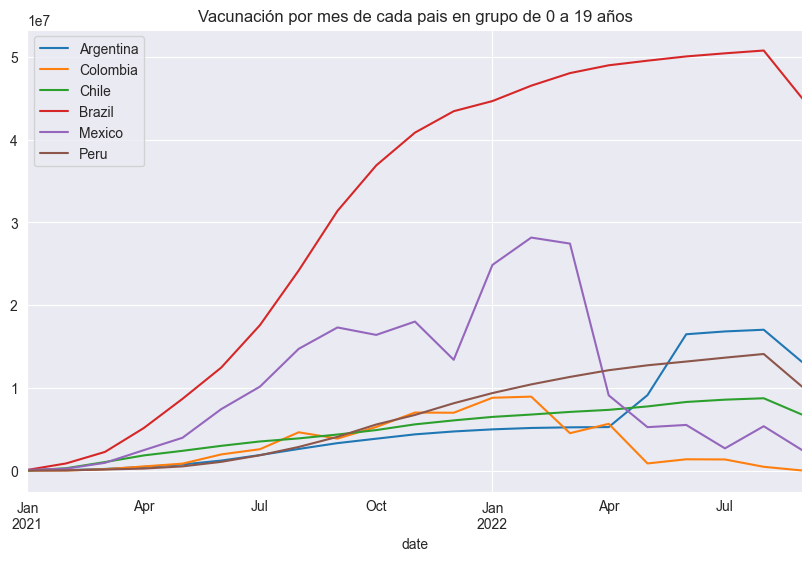

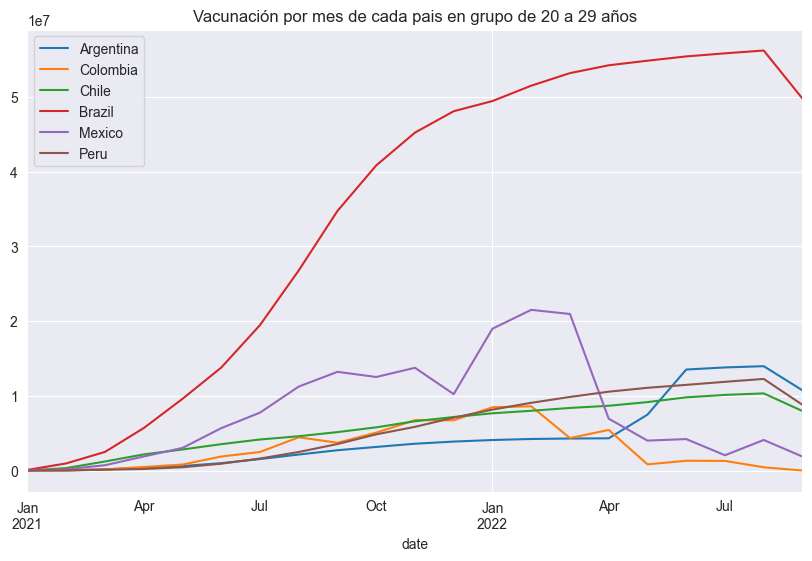

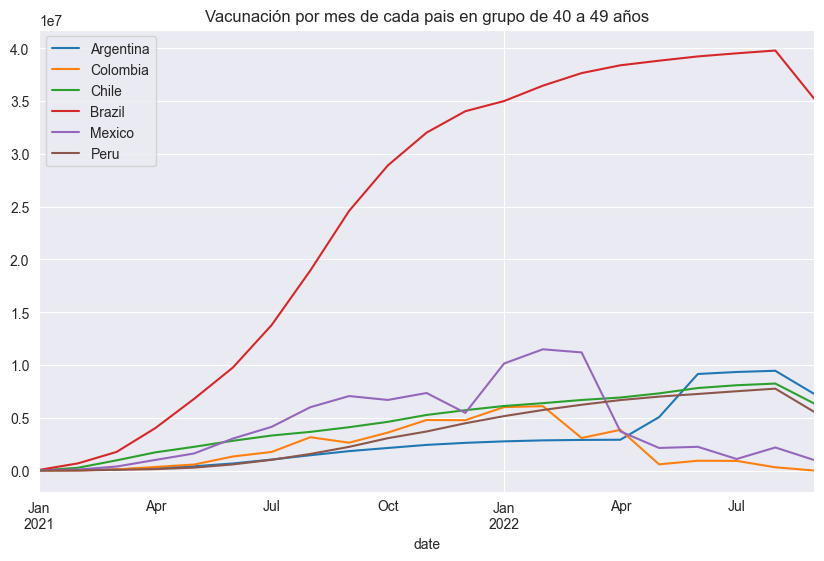

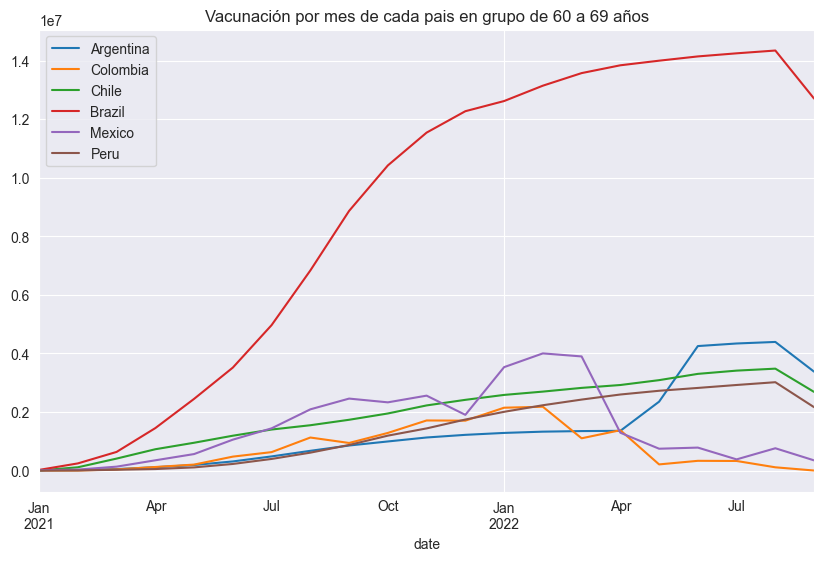

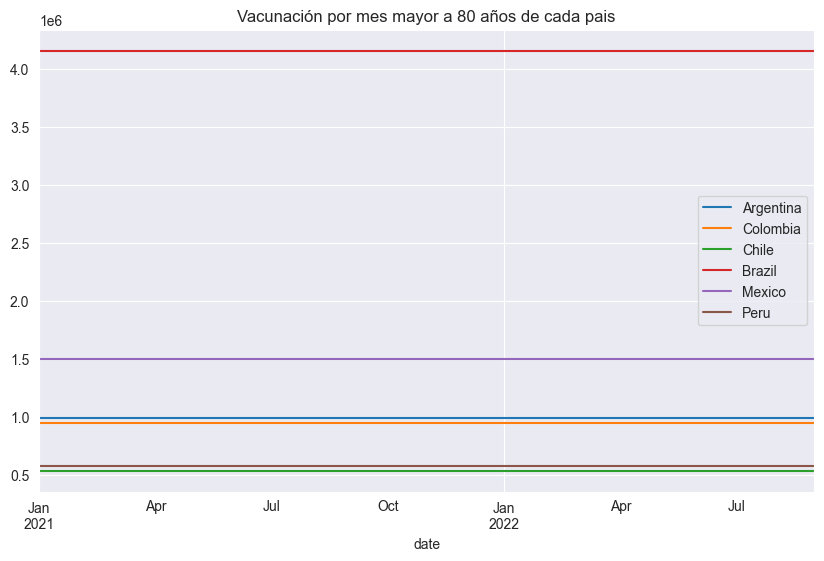

In [ ]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered

fig, ax = plt.subplots(figsize=(10, 6))   
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True) ['population_age_00_19_vacunados'].plot()
plt. title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_seleccionados)
plt. show()

fig, ax = plt.subplots(figsize=(10, 6))   
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True) ['population_age_20_29_vacunados'].plot()
plt. title('Vacunación por mes de cada pais en grupo de 20 a 29 años')
plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_seleccionados)
plt. show()

fig, ax = plt.subplots(figsize=(10, 6))   
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True) ['population_age_40_49_vacunados'].plot()
plt. title('Vacunación por mes de cada pais en grupo de 40 a 49 años')
plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_seleccionados)
plt. show()

fig, ax = plt.subplots(figsize=(10, 6))   
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True) ['population_age_60_69_vacunados'].plot()
plt. title('Vacunación por mes de cada pais en grupo de 60 a 69 años')
plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_seleccionados)
plt. show()

fig, ax = plt.subplots(figsize=(10, 6))   
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True) ['population_age_80_and_older'].plot()
plt. title('Vacunación por mes mayor a 80 años de cada pais')
plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_seleccionados)
plt. show()


###### P.-Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

<function matplotlib.pyplot.show(close=None, block=None)>

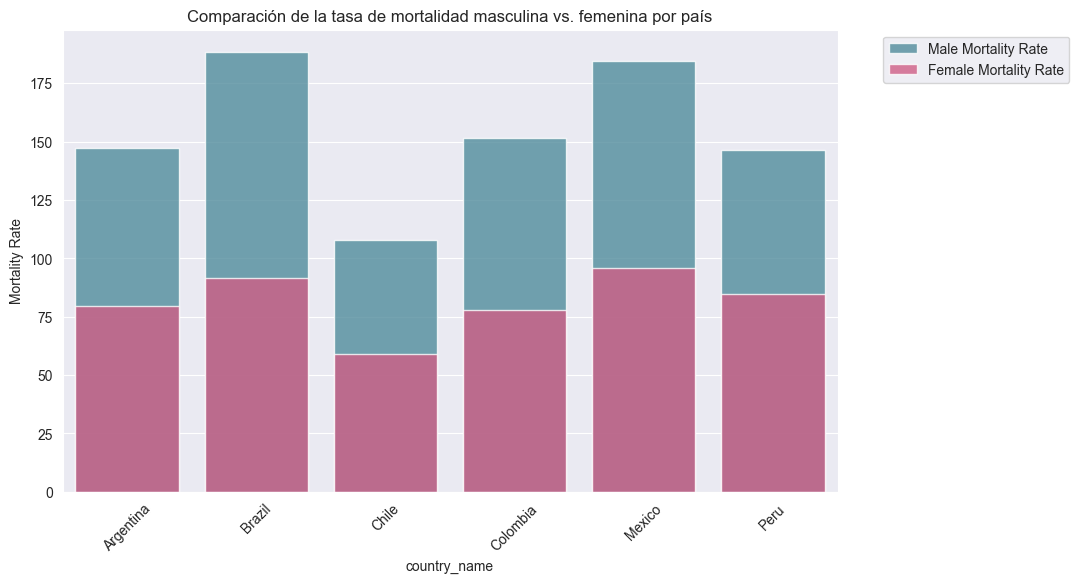

In [ ]:
#Gráfica de mortalidad por genero
plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='#4493A8', alpha=0.8, label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='#E24C80', alpha=0.8, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show

###### Q.-Matriz de correlación de indicadores demográficos y de salud.

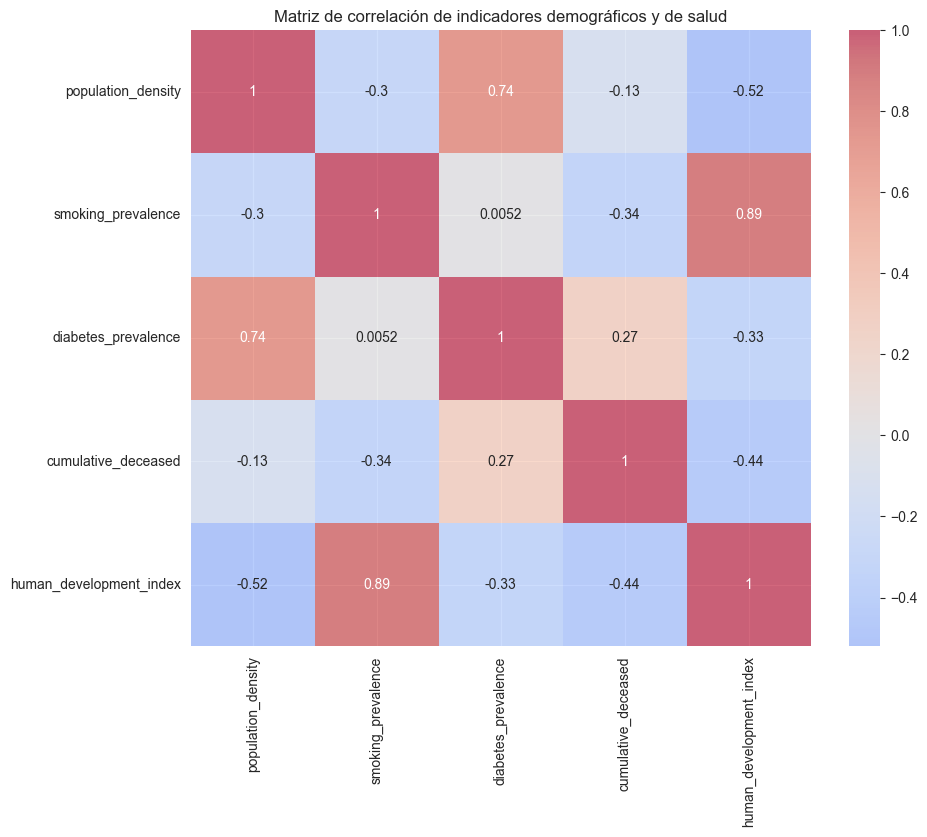

In [ ]:
# Seleccionamos las columnas para nuestros análisis
columna_matriz=['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
matriz_correlacion_1= data_latinoamerica_paises[columna_matriz].corr()
# Creamos la gráfica
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion_1, annot=True, cmap='coolwarm', center=0, alpha=0.6)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

R.- Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

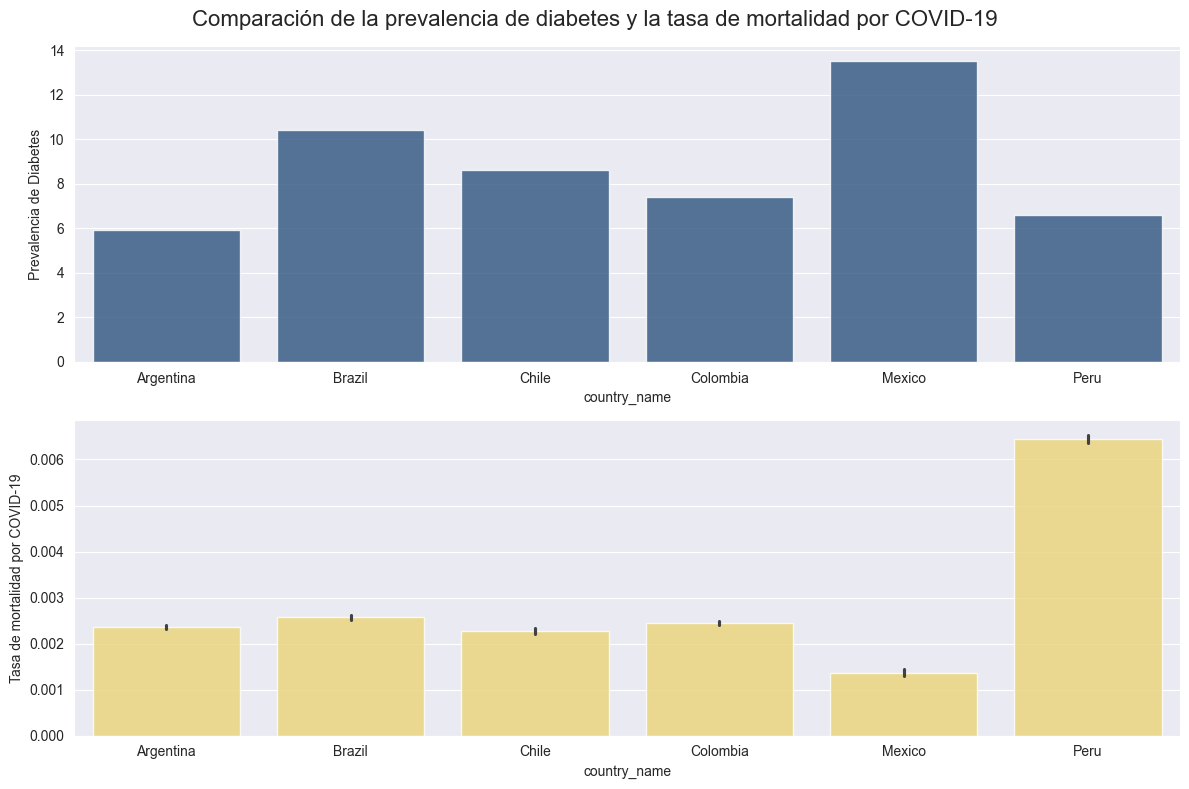

In [ ]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='diabetes_prevalence', color='#21538B', alpha=0.8, ax=ax)
ax.set_ylabel('Prevalencia de Diabetes')


# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=data_latinoamerica_paises, x='country_name', y=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='#FDE066', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de diabetes y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

Comparación de la Prevalencia de smoking y la Tasa de Mortalidad.

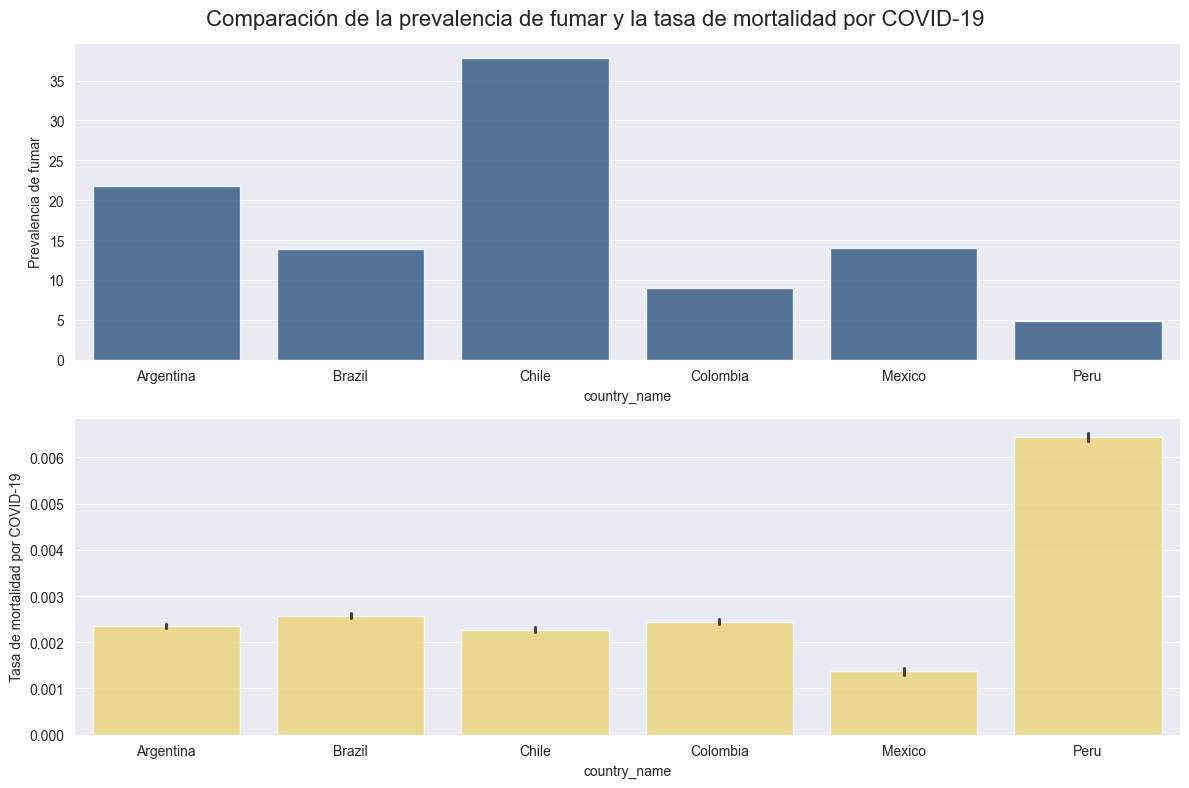

In [ ]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='smoking_prevalence', color='#21538B', alpha=0.8, ax=ax,)
ax.set_ylabel('Prevalencia de fumar')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data_latinoamerica_paises, x='country_name', y=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='#FDE066', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de fumar y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

### Avance 3

##### 1. Importamos las librerías a utilizar en esta sección

In [1]:
import pandas as pd                 # Se importa la libreria pandas
import numpy as np                  # Se importa la libreria numpy
import matplotlib.pyplot as plt     # Se importa la libreria matplotlib
import seaborn as sns               # Se importa la libreria seaborn

##### 2. Leemos el archivo csv con el cual relizaremos nuestro análisis

In [2]:
# El archivo csv se va a leer con la librería pandas

data_latinoamerica_paises_03=pd.read_csv('DatosFinalesFiltrados.csv')

In [3]:
# Realizamos una explacion del archivo csv

data_latinoamerica_paises_03

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina         7767.0   
1              AR  2021-01-03           AR    Argentina         4934.0   
2              AR  2021-01-04           AR    Argentina        13953.0   
3              AR  2021-01-05           AR    Argentina        14085.0   
4              AR  2021-01-06           AR    Argentina        14496.0   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru         1150.0   
3740           PE  2022-09-14           PE         Peru            0.0   
3741           PE  2022-09-15           PE         Peru            0.0   
3742           PE  2022-09-16           PE         Peru            0.0   
3743           PE  2022-09-17           PE         Peru            0.0   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0            166.0             1670634.0              46688.0   
1            157.0             1675568.0              46845.0   
2            157.0             1689521.0              47002.0   
3            160.0             1703606.0              47162.0   
4            131.0             1718102.0              47293.0   
...            ...                   ...                  ...   
3739          22.0             4127612.0             216173.0   
3740           0.0             4127612.0             216173.0   
3741           0.0             4127612.0             216173.0   
3742           0.0             4127612.0             216173.0   
3743           0.0             4127612.0             216173.0   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [4]:
# Pasamos los valores de la columna date al tipo datetime, para poder hacer un análisis a lo largo del tiempo

data_latinoamerica_paises_03['date'] = pd.to_datetime(data_latinoamerica_paises_03['date'])
data_latinoamerica_paises_03.set_index('date', inplace=True) # lo que se busca con este código es que la fecha sea en el indice de nuestro DF

In [5]:
# Antes de comenzar con las visualizaciones defino la paleta de colores a utilizar en los diferentes gráficos

mi_paleta = ['#5E8FB9','#78B056','#325F8C','#D2293D','#FFCC9E','#DB5920']

##### 3. Realizamos los gráficos que nos permitiran hallar tendecias/patrones

a.-Evolución de Casos Activos vs. Recuperados

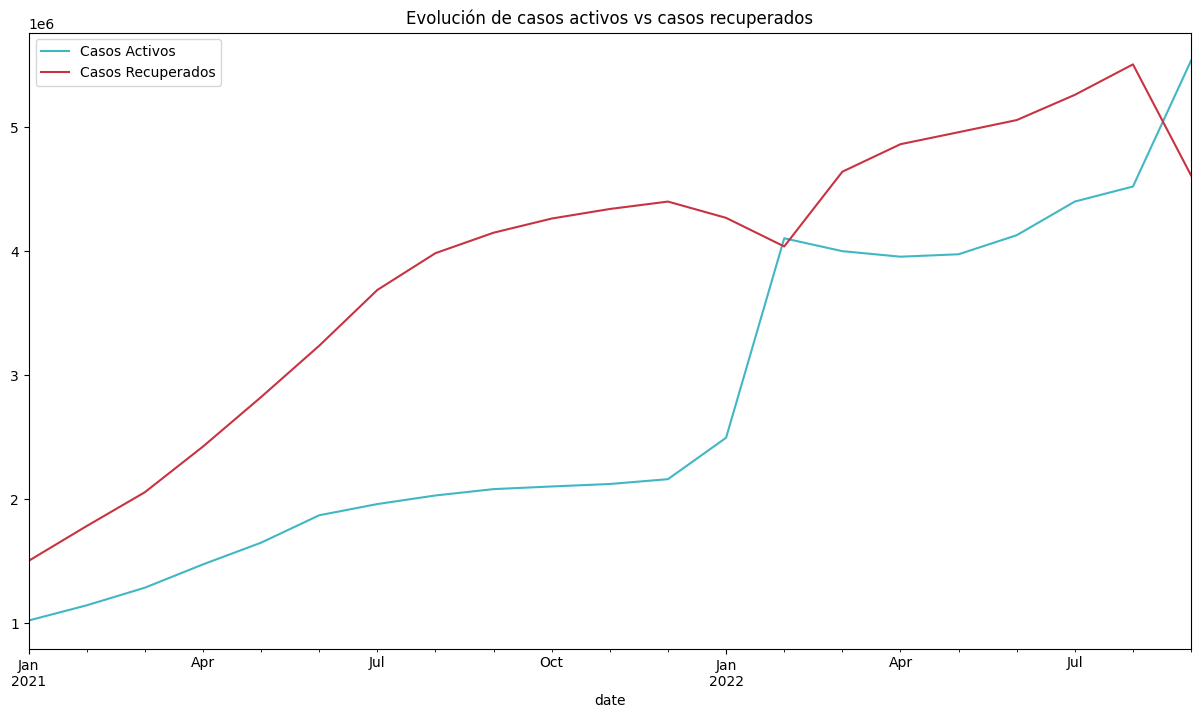

In [6]:
#Creación de la figura
plt.figure(figsize=(15,8))

#Creo casos activos
data_latinoamerica_paises_03['casos_activos']= data_latinoamerica_paises_03['cumulative_confirmed']-data_latinoamerica_paises_03['cumulative_deceased']-data_latinoamerica_paises_03['cumulative_recovered']

#Creación de las gráficas

data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True)['casos_activos'].plot(color='#41B7C4', label='Casos Activos')
data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot(color='#C83342', label='Casos Recuperados')
plt.title('Evolución de casos activos vs casos recuperados')
plt.legend(loc='upper left')
plt.show()

b.-Tasa de Crecimiento (%)

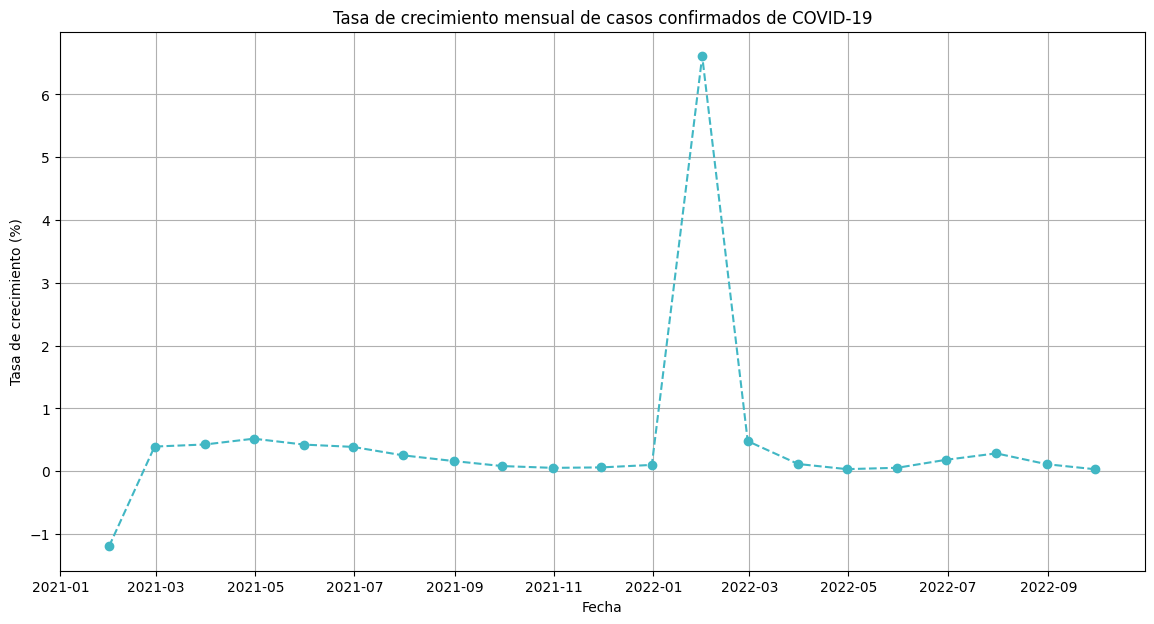

In [7]:
# Calcular la tasa de crecimiento (%)
data_latinoamerica_paises_03['tasa_crecimiento'] = data_latinoamerica_paises_03['cumulative_confirmed'].pct_change() * 100

# Eliminar valores NaN y columnas no numéricas
df_numericas = data_latinoamerica_paises_03.select_dtypes(include=['float64', 'int64']).dropna()

# Resample y calcular la media
df_resampled = df_numericas.resample('ME').mean()

# Graficar la tasa de crecimiento
plt.figure(figsize=(14, 7))
plt.plot(df_resampled.index, df_resampled['tasa_crecimiento'], marker='o', color='#41B7C4', linestyle='--')
plt.title('Tasa de crecimiento mensual de casos confirmados de COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento (%)')
plt.grid(True)
plt.show()


c.-Relación entre la Cobertura de Vacunación y la Reducción de Casos

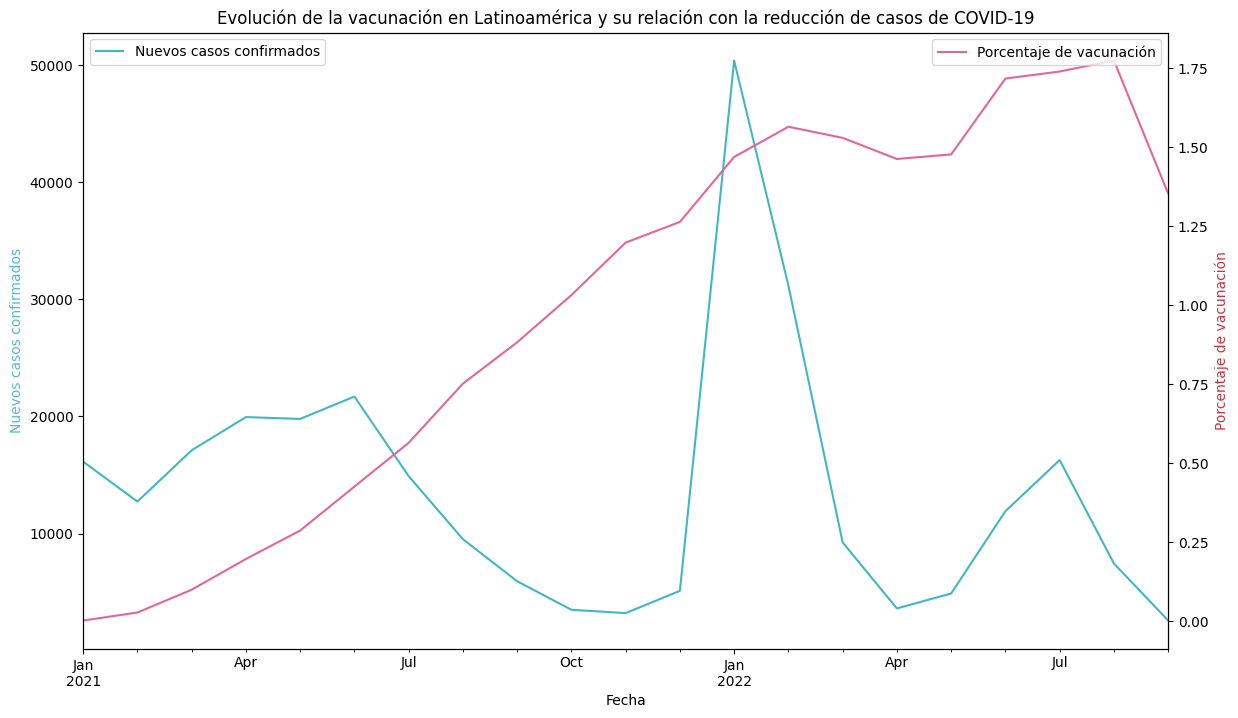

In [8]:
# Creo la figura 
plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()  # Crear un segundo eje y


# Crear porcentaje de vacunación
data_latinoamerica_paises_03['porcentaje_vacunacion'] = data_latinoamerica_paises_03['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises_03['population']

# Graficar los nuevos casos confirmados y el porcentaje de vacunación
data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='#41B7C4', label='Nuevos casos confirmados')
data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True)['porcentaje_vacunacion'].plot(ax=ax2, color='#E3669B', label='Porcentaje de vacunación')


# Configuración del gráfico
ax1.set_ylabel('Nuevos casos confirmados', color='#55B9D2')
ax2.set_ylabel('Porcentaje de vacunación', color='#C83342')
ax1.set_xlabel('Fecha')
plt.title('Evolución de la vacunación en Latinoamérica y su relación con la reducción de casos de COVID-19')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

d.-Progreso de la vacunación por país

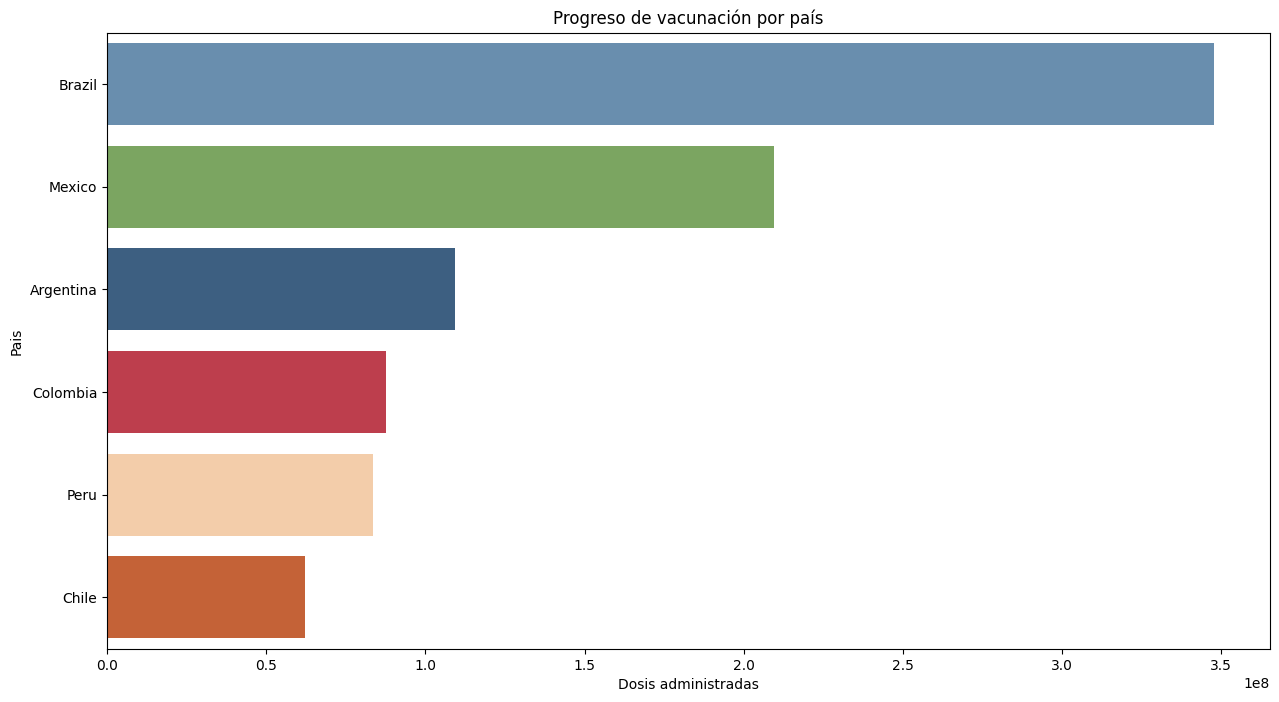

In [9]:
# Creamos la variable y agrupamos cumulative_vaccine_doses_administered por pais de forma ascendente
datos_vacunacion = data_latinoamerica_paises_03.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Creo la figura con sus atributos
plt.figure(figsize=(15,8))
sns.barplot(x=datos_vacunacion.values, y=datos_vacunacion.index, hue=datos_vacunacion.index, palette=mi_paleta)
plt.title('Progreso de vacunación por país')
plt.xlabel('Dosis administradas')
plt.ylabel('Pais')
plt.show()

e.-Nuevos casos y temperatura promedio

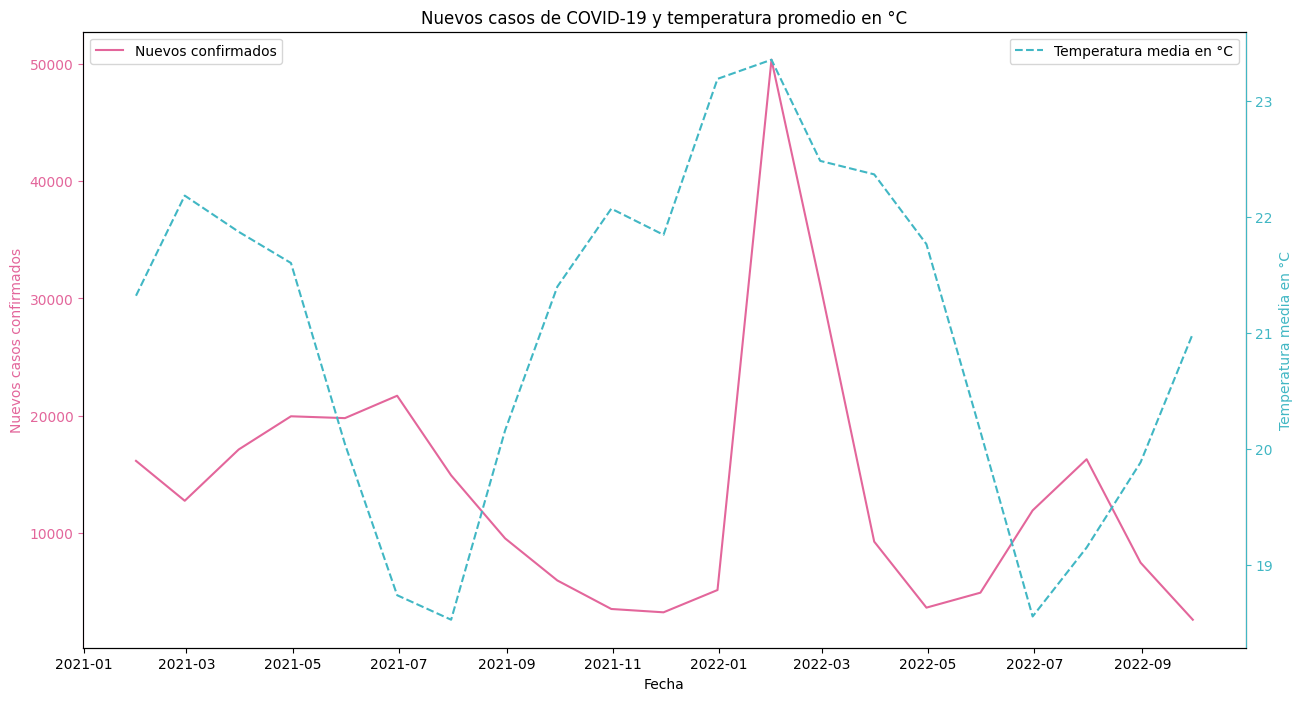

In [10]:
# Crear figura y ejes
plt.figure(figsize=(15, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Graficar la línea de nuevos confirmados
ax1.plot(data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True)['new_confirmed'], color='#E3669B', label='Nuevos confirmados')

# Graficar la línea de temperatura con estilo punteado
ax2.plot(data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises_03.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='#41B7C4', label='Temperatura media en °C', linestyle='--')

# Configurar ejes y etiquetas
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='#E3669B')
ax2.set_ylabel('Temperatura media en °C', color='#41B7C4')

# Cambiar color de los ejes y etiquetas
ax1.tick_params(axis='y', colors='#E3669B')  # Color de los ticks del eje y de la izquierda
ax2.tick_params(axis='y', colors='#41B7C4')  # Color de los ticks del eje y de la derecha
ax1.spines['left'].set_color('#E3669B')  # Color del eje y de la izquierda
ax2.spines['right'].set_color('#41B7C4')  # Color del eje y de la derecha

# Título y leyendas
plt.title('Nuevos casos de COVID-19 y temperatura promedio en °C')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

f.-Impacto de la Urbanización en la Propagación del Covid-19

C:\Users\Anto\AppData\Local\Temp\ipykernel_4292\2391396629.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_urbanizacion['porcentaje_urbanizacion'], y=casos_urbanizacion.index,  palette=mi_paleta, alpha=0.8)


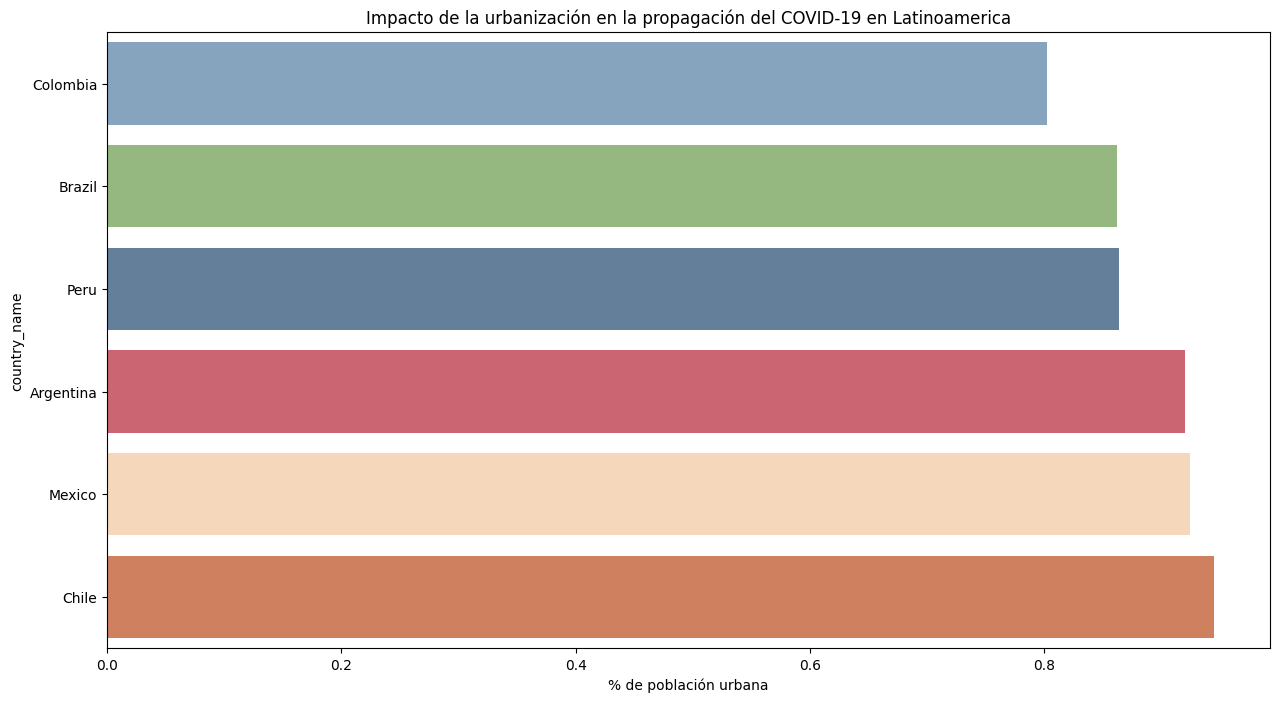

In [11]:
# Calculamos el porcentaje de urbanización
data_latinoamerica_paises_03['porcentaje_urbanizacion'] = data_latinoamerica_paises_03['population_urban']/data_latinoamerica_paises_03['population']

## Agrupamos por país y obtenemos el último valor, luego ordenamos por porcentaje de urbanización
casos_urbanizacion = data_latinoamerica_paises_03.groupby('country_name').last().sort_values(by='porcentaje_urbanizacion')

# Creamos el gráfico de barras
plt.figure(figsize=(15,8))
sns.barplot(x=casos_urbanizacion['porcentaje_urbanizacion'], y=casos_urbanizacion.index,  palette=mi_paleta, alpha=0.8)
plt.title('Impacto de la urbanización en la propagación del COVID-19 en Latinoamerica')
plt.xlabel('% de población urbana')
plt.show()

g.-Evolución de los casos de COVID-19 a lo largo del tiempo

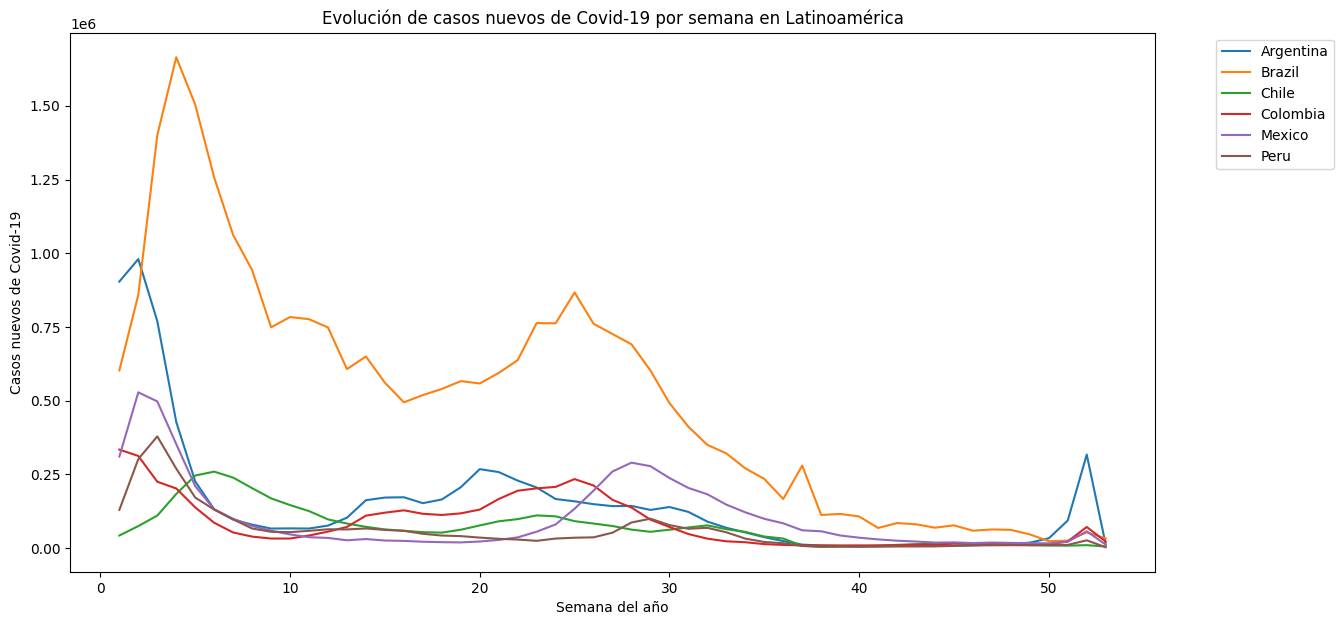

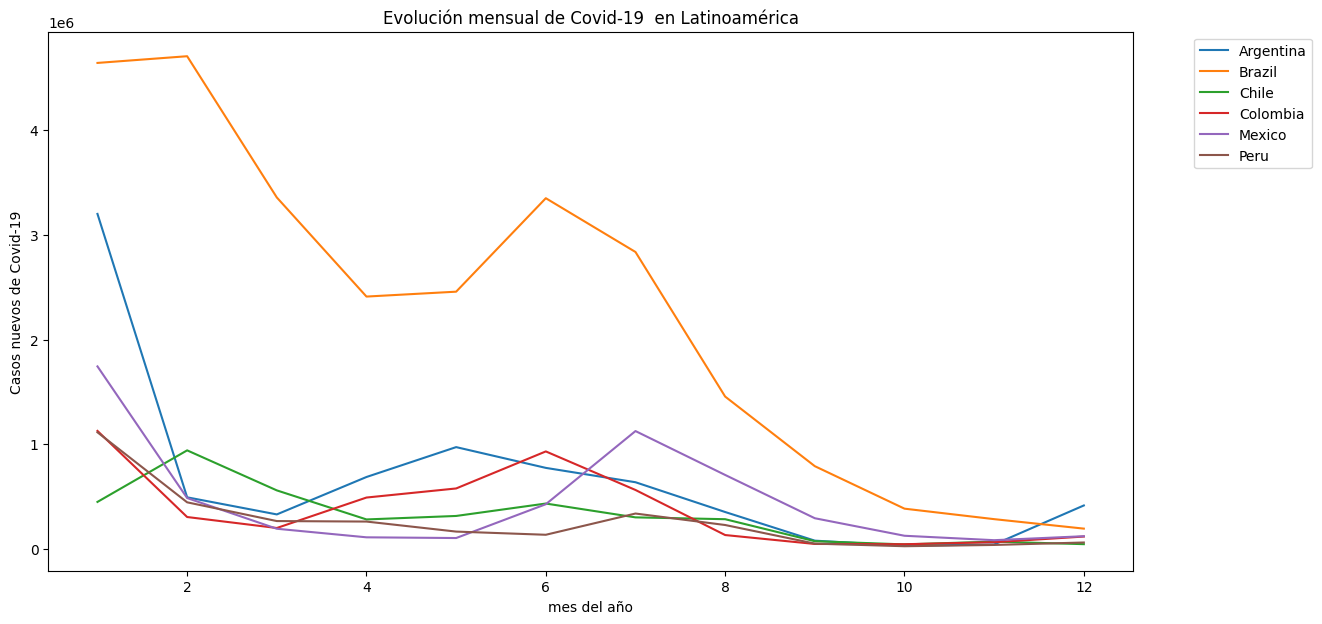

In [12]:
#Obtenemos la semana y el mes a partir del indece de fecha
data_latinoamerica_paises_03['week'] = data_latinoamerica_paises_03.index.isocalendar().week
data_latinoamerica_paises_03['month'] = data_latinoamerica_paises_03.index.month

# Creamos el gráfico de lineas para las semanas
casos_semanales= data_latinoamerica_paises_03.groupby(['week','country_name'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for pais in casos_semanales['country_name'].unique():
    casos_semanales_pais = casos_semanales[casos_semanales['country_name']== pais]
    plt.plot(casos_semanales_pais['week'],casos_semanales_pais['new_confirmed'],label=pais) 

plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos de Covid-19')
plt.title('Evolución de casos nuevos de Covid-19 por semana en Latinoamérica')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# Creamos el gráfico de lineas para los meses
data_latinoamerica_paises_03['month'] = data_latinoamerica_paises_03.index.month
casos_mensuales= data_latinoamerica_paises_03.groupby(['month','country_name'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for pais in casos_mensuales['country_name'].unique():
    casos_mensuales_pais = casos_mensuales[casos_mensuales['country_name']== pais]
    plt.plot(casos_mensuales_pais['month'],casos_mensuales_pais['new_confirmed'],label=pais) 

plt.xlabel('mes del año')
plt.ylabel('Casos nuevos de Covid-19')
plt.title('Evolución mensual de Covid-19  en Latinoamérica')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

h.-Distribución de la Población por Edad en Países

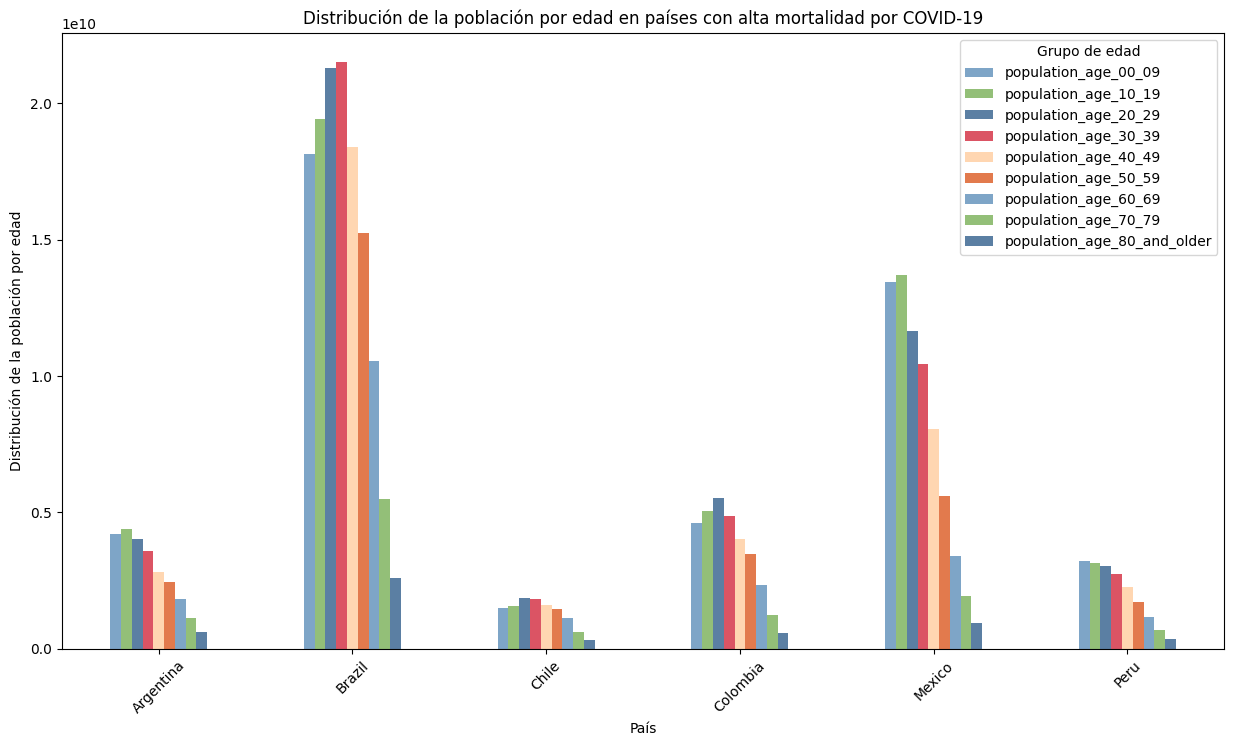

In [13]:
# Seleccionar los países con alta mortalidad
paises_alta_mortalidad = data_latinoamerica_paises_03.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(6).index

# Definir el grupo de edades
grupo_edades = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Calcular la distribución de edades para los países con alta mortalidad
distribucion_edades = data_latinoamerica_paises_03[data_latinoamerica_paises_03['country_name'].isin(paises_alta_mortalidad)].groupby('country_name')[grupo_edades].sum()

# Graficar la distribución de la población por edad
distribucion_edades.plot(kind='bar', stacked=False, figsize=(15, 8),color=mi_paleta, alpha=0.8)
plt.title('Distribución de la población por edad en países con alta mortalidad por COVID-19')
plt.xlabel('País')
plt.ylabel('Distribución de la población por edad')
plt.legend(title='Grupo de edad')
plt.xticks(rotation=45)
plt.show()

i.-Comparación de Estrategias de Vacunación en América Latina

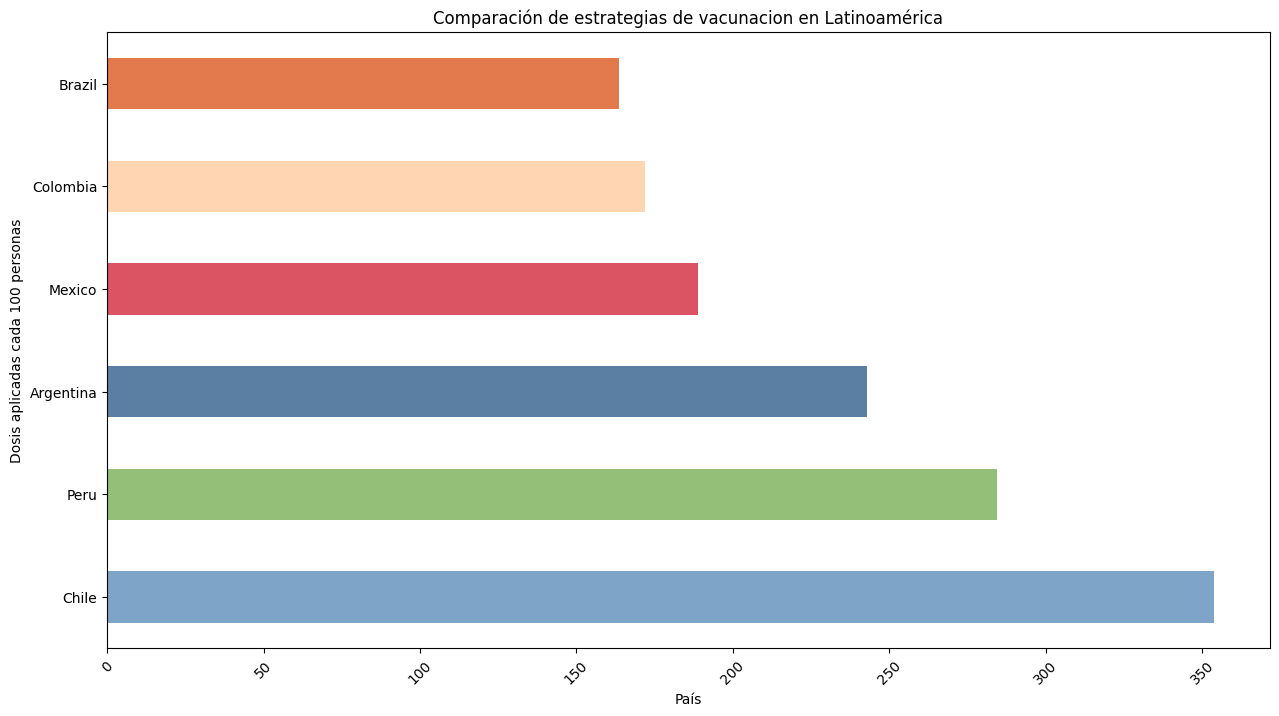

In [14]:
# Calculamos la estrategia de vacunación: dosis administradas por cada 100 personas
estrategia_vacunacion = data_latinoamerica_paises_03.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises_03.groupby('country_name')['population'].max() * 100

# Ordenamos los valores de mayor a menor y crear un gráfico de barras horizontales
estrategia_vacunacion.sort_values(ascending=False).plot(kind='barh', figsize=(15,8), color=mi_paleta, alpha=0.8)

# Creamos el gráfico y lo personalizamos
plt.title('Comparación de estrategias de vacunacion en Latinoamérica')
plt.xlabel('País')
plt.ylabel('Dosis aplicadas cada 100 personas')
plt.xticks(rotation=45) # # Rotamos las etiquetas del eje x para una mejor visualización
plt.show() # Mostramos el gráfico

j.-Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

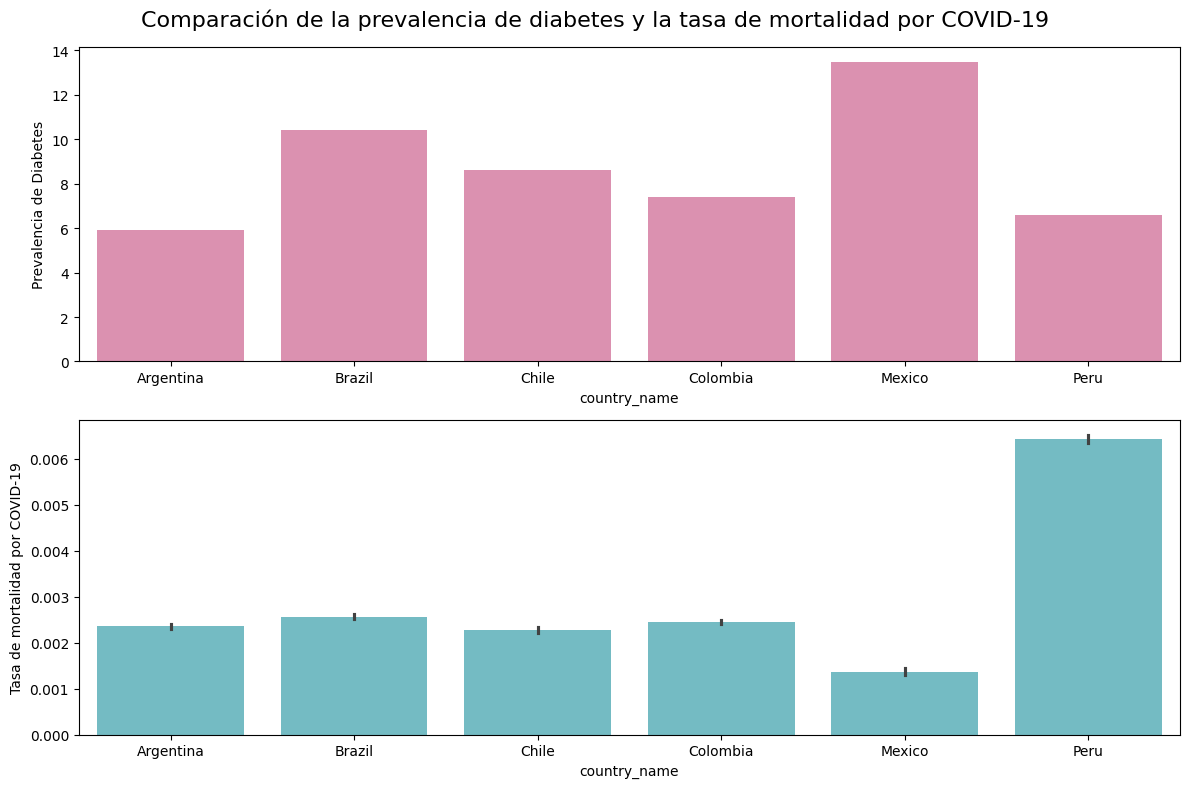

In [17]:
# Comparación de la prevalencia de diabetes vs la tasa de mortalidad por COVID-19
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=data_latinoamerica_paises_03, x='country_name', y='diabetes_prevalence', color='#E3669B', alpha=0.8, ax=ax)
ax.set_ylabel('Prevalencia de Diabetes')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=data_latinoamerica_paises_03, x='country_name', y=data_latinoamerica_paises_03['cumulative_deceased'] / data_latinoamerica_paises_03['population'], color='#41B7C4', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de diabetes y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

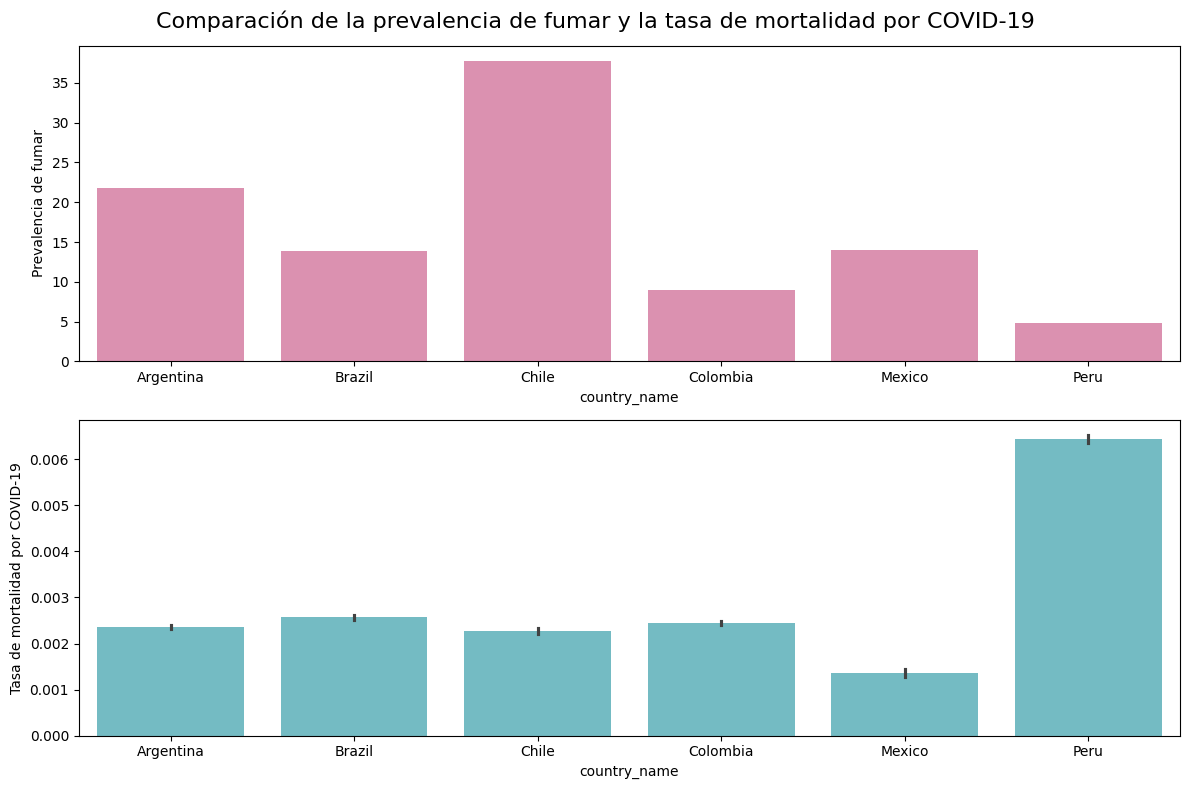

In [18]:
#Comparación de la Prevalencia de smoking y la Tasa de Mortalidad.
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=data_latinoamerica_paises_03, x='country_name', y='smoking_prevalence', color='#E3669B', alpha=0.8, ax=ax,)
ax.set_ylabel('Prevalencia de fumar')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=data_latinoamerica_paises_03, x='country_name', y=data_latinoamerica_paises_03['cumulative_deceased'] / data_latinoamerica_paises_03['population'], color='#41B7C4', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de fumar y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

k.-Mortalidad por País

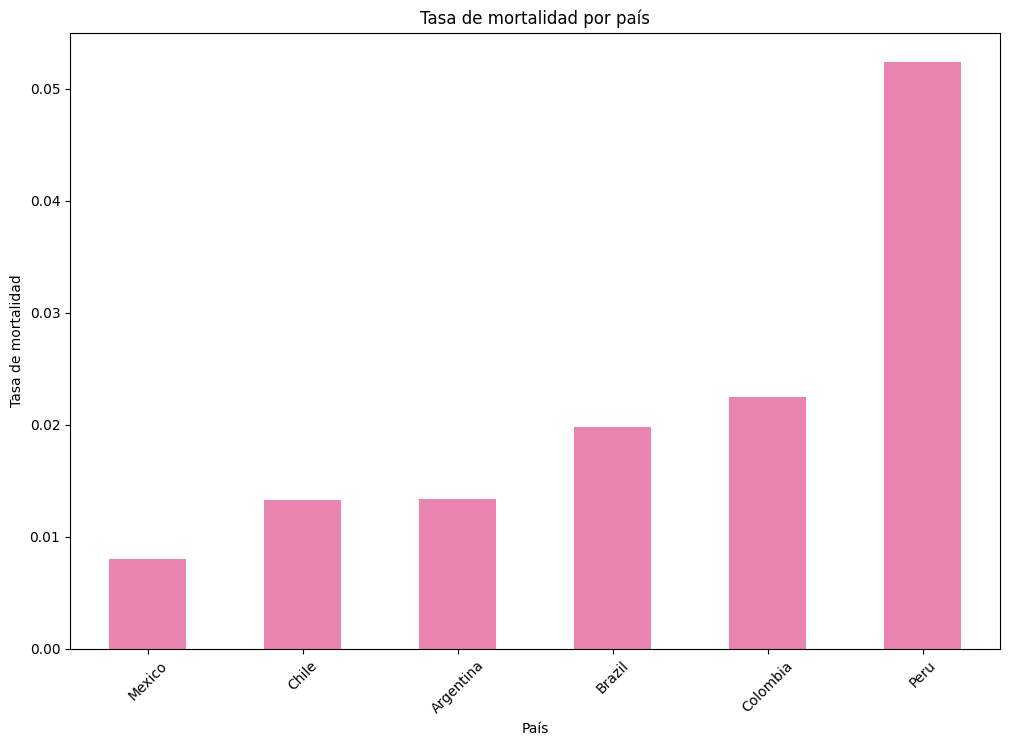

In [19]:
# Creamos una nueva columna 'ratio_mortalidad' que calcula la tasa de mortalidad como la relación entre muertes acumuladas y casos confirmados acumulados
data_latinoamerica_paises_03['ratio_mortalidad'] = data_latinoamerica_paises_03['cumulative_deceased'] / data_latinoamerica_paises_03['cumulative_confirmed']

# Agrupamos los datos por 'country_name' y obtenemos la última tasa de mortalidad registrada para cada país
mortalidad = data_latinoamerica_paises_03.groupby('country_name')['ratio_mortalidad'].last().sort_values()

# Creacion del gráfico y sus configaración

plt.figure(figsize=(12,8)) # Tamaño de la figura del gráfico
mortalidad.plot(kind='bar', color='#E3669B', alpha= 0.8) # Graficar la tasa de mortalidad como un gráfico de barras, con países en el eje x y la tasa de mortalidad en el eje y
plt.xlabel('País') # Etiqueta del eje x
plt.ylabel('Tasa de mortalidad') # Etiqueta del eje y
plt.title('Tasa de mortalidad por país') # Título del gráfico
plt.savefig('Tasa de mortalidad por país')
plt.xticks(rotation=45) # Rotar las etiquetas para una mejor visualización

plt.show() # Mostramos el gráfico

l.- Evolución de la mortalidad en Latinoamérica

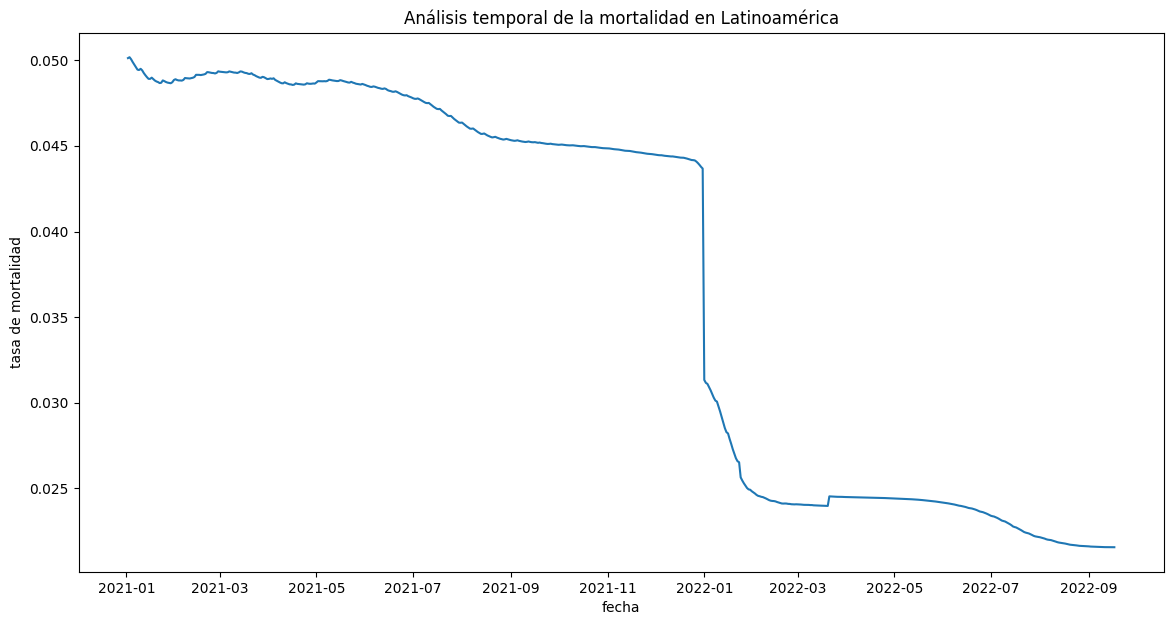

In [20]:
fig, ax = plt.subplots(figsize=(14,7)) # Tamaño de la figura del gráfico
sns.lineplot(data=data_latinoamerica_paises_03, x='date', y='ratio_mortalidad', estimator='mean', errorbar=None) # El ratio ya se cálculo en el anterior punto
plt.title('Análisis temporal de la mortalidad en Latinoamérica') # Título del gráfico
plt.xlabel("fecha") #Etiqueta eje x
plt.ylabel("tasa de mortalidad") #Etiqueta eje y
plt.show() # Mostramos el gráfico

m.-Comparación de la Situación Actual (Contexto de los datos)

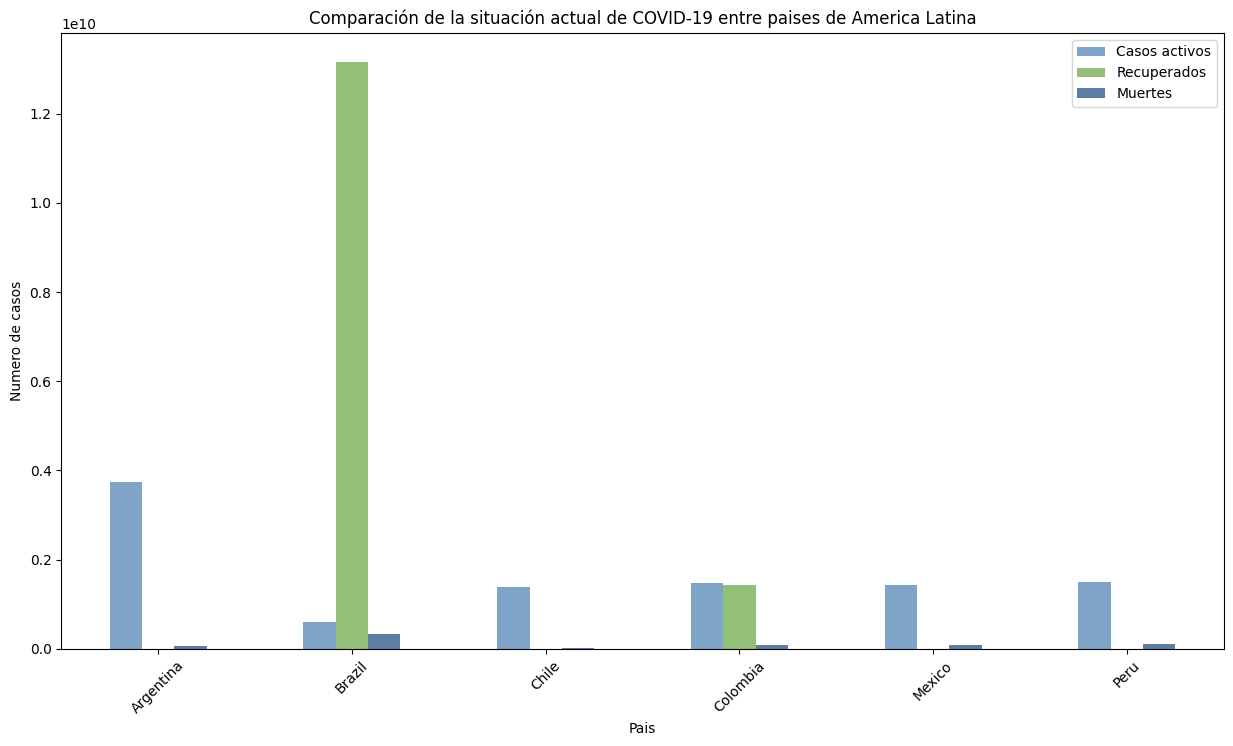

In [21]:
situacion_actual= data_latinoamerica_paises_03.groupby('country_name').sum()[['casos_activos','cumulative_recovered','cumulative_deceased']]
situacion_actual.plot(kind='bar', figsize=(15,8), color=mi_paleta, alpha=0.8)

plt.title("Comparación de la situación actual de COVID-19 entre paises de America Latina")
plt.xlabel("Pais")
plt.ylabel("Numero de casos")
plt.legend(["Casos activos", "Recuperados", "Muertes"])
plt.xticks(rotation=45)

plt.show()

### 4.Extra credit

In [23]:
# Utilizamos la libreria folium para visualizar los países
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados

import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises_03[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

In [31]:
data_latinoamerica_3_avance = data_latinoamerica_paises_03

In [35]:
valores_nulos=data_latinoamerica_paises_03.isnull().sum()[data_latinoamerica_paises_03.isnull().sum()>0] 
print(valores_nulos)
print(np.shape(data_latinoamerica_paises_03))


tasa_crecimiento    1
dtype: int64
(3744, 56)


In [40]:
# Rellenar valores nulos en la columna 'tasa_crecimiento' usando forward fill
data_latinoamerica_paises_03['tasa_crecimiento'].fillna(method='ffill', inplace=True)

# Rellenar valores nulos restantes usando backward fill
data_latinoamerica_paises_03['tasa_crecimiento'].fillna(method='bfill', inplace=True)

# Verificar que ya no hay valores nulos
print("Valores nulos después de rellenar:\n", data_latinoamerica_paises_03.isnull().sum())

# Comprobar las dimensiones del DataFrame después de rellenar los valores nulos
print("Dimensiones del DataFrame:", np.shape(data_latinoamerica_paises_03))



Valores nulos después de rellenar:
 location_key                             0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_age_70_

C:\Users\Anto\AppData\Local\Temp\ipykernel_8056\3530177942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_latinoamerica_paises_03['tasa_crecimiento'].fillna(method='ffill', inplace=True)
C:\Users\Anto\AppData\Local\Temp\ipykernel_8056\3530177942.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latinoamerica_paises_03['tasa_crecimiento'].fillna(method='ffill', inplace=True)
C:\Users\Anto\AppData\Local\Temp\ipykernel_8056\3

In [42]:
data_latinoamerica_3_avance.to_csv('data_latinoamerica_dashboard.csv')

In [45]:
Data_filtrada_dashboard=pd.read_csv(r'C:\Users\Anto\Desktop\PI4\data_latinoamerica_dashboard.csv',sep=',')